**Step 1- Web Scraping and Step and Step 2- Data processing**
I performed scraping and processing at the same time before storing data in CSV

Library installation

In [25]:

!pip install selenium
!pip install selenium-stealth
# install chromium-chromedriver (these commands are for ubuntu)
#!apt-get update
!apt install chromium-chromedriver


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
chromium-chromedriver is already the newest version (1:85.0.4183.83-0ubuntu2.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.


Importing necessary libraries

In [26]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from time import sleep
from selenium_stealth import stealth
import re
import csv

chrome_options = webdriver.ChromeOptions()


# google colab allows only headless mode => no gui

# disable this locally if you want to see the browser window

chrome_options.add_argument('--headless')

# set window size, click() does not work if window has no size

chrome_options.add_argument('--window-size=3200,2000')

# other options, might not be needed

chrome_options.add_argument('--no-sandbox')

chrome_options.add_argument('--disable-dev-shm-usage')

chrome_options.add_argument('--enable-javascript')
chrome_options.add_argument('--ignore-certificate-errors')
    #options.add_argument("--test-type")

chrome_options.add_argument("--incognito")

chrome_options.add_argument("--verbose")



browser = webdriver.Chrome(options=chrome_options)



stealth(browser,
        languages=["en-US", "en"],
        vendor="Google Inc.",
        platform="Win32",
        webgl_vendor="Intel Inc.",
        renderer="Intel Iris OpenGL Engine",
        fix_hairline=True,
        )



**Extracting and processing data from ebookers.fi**

In [27]:
browser.get('https://www.ebookers.fi/en/Flights?gad=1&gclid=Cj0KCQjw06-oBhC6ARIsAGuzdw3gL90wdVLIMBcLtsaryV88Z3k021u15LbAFNjvYBvWYBnHhHGrBTcaAj2gEALw_wcB&langid=2057&semcid=EBOOKERS-FI.MULTILOBF.GOOGLE.GT-c-EN.FLIGHT&semdtl=a115226477422.b1131329940804.g1kwd-18709060.e1c.m1Cj0KCQjw06-oBhC6ARIsAGuzdw3gL90wdVLIMBcLtsaryV88Z3k021u15LbAFNjvYBvWYBnHhHGrBTcaAj2gEALw_wcB.r11bbd1a4a05ba71ac53746c89b8ba1ffc4e6bbfd173b4598fd4f23ce03b9675c4.c1pI1a0yj3cfKJ6KZBCF0M1w.j11005742.k1.d1560594644261.h1e.i1.l1.n1.o1.p1.q1.s1.t1.x1.f1.u1.v1.w1')

In [28]:


data = []
departure="Helsinki"
destination="Dhaka"
#date
date_month_year="15 April 2024" #pick a date for the next one year duration from August 2023 to August 2024.
date_month_year_splited=date_month_year.split()
only_date=date_month_year_splited[0]
only_month=date_month_year_splited[1]
only_year=date_month_year_splited[2]

sleep(10)
try:
  cookie_delete=browser.find_element(By.XPATH, "//button[@class=' osano-cm-dialog__close osano-cm-close ']").click()
except:
  print("No cookie")
#search_from = browser.find_element(By.ID, "mat-input-0")
#search_to = browser.find_element(By.ID, "mat-input-1")
#Choose Unidirection
unidirectional_button = browser.find_element(By.XPATH, "(//a[@class='uitk-tab-anchor'])[1]")
unidirectional_button.click()

sleep(10)

#From Helsinki field
from_button = browser.find_element(By.XPATH, "(//button[@class='uitk-fake-input uitk-form-field-trigger'])[1]").click()
sleep(10)

from_input = browser.find_element(By.XPATH, "//div[@class='uitk-field has-no-visible-label has-placeholder']//input")
from_input.send_keys(departure)
sleep(2)
from_first_element=browser.find_element(By.XPATH, "(//button[@class='uitk-button uitk-button-medium uitk-button-fullWidth has-subtext origin_select-result-item-button result-item-button'])[1]")
from_first_element.click()
sleep(2)

#To doha field
to_button = browser.find_element(By.XPATH, "(//button[@class='uitk-fake-input uitk-form-field-trigger'])[2]")
to_button.click()
sleep(2)
to_input = browser.find_element(By.XPATH, "//input[@class='uitk-field-input uitk-typeahead-input uitk-typeahead-input-v2']")
to_input.send_keys(destination)
sleep(2)
to_first_element=browser.find_element(By.XPATH, "(//button[@class='uitk-button uitk-button-medium uitk-button-fullWidth has-subtext destination_select-result-item-button result-item-button'])[1]")
to_first_element.click()



date_button = browser.find_element(By.XPATH, "//button[@id='date_form_field-btn']")
date_button.click()
sleep (2)
get_web_month_year = browser.find_element(By.XPATH, "(//h2[@class='uitk-date-picker-month-name uitk-type-medium'])[1]").text
#date_month=get_month_year.getText();

get_web_month_year_splited=get_web_month_year.split()
web_only_month=get_web_month_year_splited[0]
web_only_year=get_web_month_year_splited[1]
print (get_web_month_year)

get_web_next_month_year = browser.find_element(By.XPATH, "(//h2[@class='uitk-date-picker-month-name uitk-type-medium'])[2]").text
#date_month=get_month_year.getText();

get_web_next_month_year_splited=get_web_next_month_year.split()
web_only_next_month=get_web_next_month_year_splited[0]
web_only_next_year=get_web_next_month_year_splited[1]
print (get_web_next_month_year)

for year in range(10):
    print ()
    if only_year==web_only_year or only_year==web_only_next_year:
        print ('Found year')
        print (only_month)
        print (web_only_month)
        print (web_only_next_month)
        if only_month==web_only_month or only_month==web_only_next_month:
            if only_month==web_only_month:
                print ("Found at the first table")
                date_pick=browser.find_element(By.XPATH, "(//button[@data-day='" + only_date + "'])[1]")
                date_pick.click()
                date_pick_done=browser.find_element(By.XPATH, "(//button[@class='uitk-button uitk-button-medium uitk-button-has-text uitk-button-primary'])[1]")
                date_pick_done.click()
                break
            if only_month==web_only_next_month:
                print ("Found at the 2nd table")
                date_pick=browser.find_element(By.XPATH, "(//button[@data-day='" + only_date + "'])[2]")
                date_pick.click()
                date_pick_done=browser.find_element(By.XPATH, "(//button[@class='uitk-button uitk-button-medium uitk-button-has-text uitk-button-primary'])[1]")
                date_pick_done.click()
                break
        else:
            print ('not Found month doing next')
            calender_next_button=browser.find_element(By.XPATH, "(//button[@class='uitk-button uitk-button-medium uitk-button-only-icon uitk-layout-flex-item uitk-button-paging'])[2]")
            calender_next_button.click()

            get_web_month_year = browser.find_element(By.XPATH, "(//h2[@class='uitk-date-picker-month-name uitk-type-medium'])[1]").text
            get_web_month_year_splited=get_web_month_year.split()
            web_only_month=get_web_month_year_splited[0]
            web_only_year=get_web_month_year_splited[1]
            print (get_web_month_year)

            get_web_next_month_year = browser.find_element(By.XPATH, "(//h2[@class='uitk-date-picker-month-name uitk-type-medium'])[2]").text

            get_web_next_month_year_splited=get_web_next_month_year.split()
            web_only_next_month=get_web_next_month_year_splited[0]
            web_only_next_year=get_web_next_month_year_splited[1]
            print (get_web_next_month_year)


    else:
        print ('not Found year doing next')
        calender_next_button=browser.find_element(By.XPATH, "(//button[@class='uitk-button uitk-button-medium uitk-button-only-icon uitk-layout-flex-item uitk-button-paging'])[2]")
        calender_next_button.click()

        get_web_month_year = browser.find_element(By.XPATH, "(//h2[@class='uitk-date-picker-month-name uitk-type-medium'])[1]").text
        get_web_month_year_splited=get_web_month_year.split()
        web_only_month=get_web_month_year_splited[0]
        web_only_year=get_web_month_year_splited[1]
        print (get_web_month_year)

        get_web_next_month_year = browser.find_element(By.XPATH, "(//h2[@class='uitk-date-picker-month-name uitk-type-medium'])[2]").text

        get_web_next_month_year_splited=get_web_next_month_year.split()
        web_only_next_month=get_web_next_month_year_splited[0]
        web_only_next_year=get_web_next_month_year_splited[1]
        print (get_web_next_month_year)

sleep(5)
#apply button click
apply_button=browser.find_element(By.XPATH, "//button[@class='uitk-button uitk-button-large uitk-button-has-text uitk-button-primary']")
apply_button.click()




#click more button
sleep(10)
show_more = browser.find_element(By.XPATH, "//button[@class='uitk-button uitk-button-medium uitk-button-has-text uitk-button-primary']")

show_more.click()
sleep(10)


# Get all the div elements
div_elements = browser.find_elements(By.XPATH, "(//span[@class='uitk-text uitk-type-400 uitk-type-medium uitk-text-emphasis-theme'])")

# Iteration for all flight informattion
for index, div in enumerate(div_elements):
    time = browser.find_element(By.XPATH, "(//span[@class='uitk-text uitk-type-400 uitk-type-medium uitk-text-emphasis-theme'])["+str(index+1)+"]").text
    splitted_time=time.split(" - ")
    arrival_time=splitted_time[0]
    departure_time=splitted_time[1]
    print(arrival_time)
    print(departure_time)

    total_time_stopover = browser.find_element(By.XPATH, "(//div[@class='uitk-text uitk-type-200 uitk-text-emphasis-theme'])["+str(index+1)+"]").text
    print (total_time_stopover)

    split = total_time_stopover.split(" ")


    total_duration=round(float(split[0].replace("h",""))+float(split[1].replace("m",""))/60, 2)
    print(total_duration)
    total_stops=(split[2])[1]
    if total_stops=="D":
        total_stops_int=0
        layover_info=""
    else:
        total_stops_int=int(total_stops)
        layover_info=browser.find_element(By.XPATH, "(//div[@class='uitk-text uitk-text-spacing-one truncate uitk-type-200 uitk-text-default-theme'])["+str(index+1)+"]").text
        print("Layover info",layover_info)
    split_layover_info=layover_info.split(" • ")
    layover_info=layover_info.replace(" • "," ")
    total_layover_hour=0
    total_layover_minute=0
    minute=0
    houre=0
    for x in range(total_stops_int):

        text = split_layover_info[x]
        char_to_find = 'h'
        # Use a regular expression to find the character followed by any numeric value
        pattern = re.compile(r'\d+' + re.escape(char_to_find))
        matches = pattern.findall(text)
        # Display the matches
        for match in matches:
            hour=int(match.replace("h", ""))


        char_to_find = 'm'
        # Use a regular expression to find the character followed by any numeric value
        pattern = re.compile(r'\d+' + re.escape(char_to_find))
        matches = pattern.findall(text)
        # Display the matches
        for match in matches:
            minute=int(match.replace("m", ""))

        total_layover_hour+=hour
        total_layover_minute+=minute

    #total_layover_time=total_layover_hour*60 + total_layover_minute
    total_layover_time=round(total_layover_hour + total_layover_minute/60, 2)

    #print(total_layover_hour)
    print(total_layover_time)

    airlines = browser.find_element(By.XPATH, "(//div[@class='uitk-text truncate-lines-2 uitk-type-200 uitk-text-default-theme'])["+str(index+1)+"]").text
    airlines= airlines.replace(" • ",", ")
    airlines=airlines.split(",")
    airlines=airlines[0]
    print (airlines)
    price = browser.find_element(By.XPATH, "(//span[@class='uitk-price-a11y is-visually-hidden'])["+str(index+1)+"]").text
    price=price.replace("€","")
    price=int(price.replace(",",""))
    print (price)
    data.append(["https://www.ebookers.fi/en/",airlines,departure_time, arrival_time, price,total_duration,total_stops_int, total_layover_time, layover_info])

    #file work




October 2023
November 2023

not Found year doing next
November 2023
December 2023

not Found year doing next
December 2023
January 2024

Found year
April
December
January
not Found month doing next
January 2024
February 2024

Found year
April
January
February
not Found month doing next
February 2024
March 2024

Found year
April
February
March
not Found month doing next
March 2024
April 2024

Found year
April
March
April
Found at the 2nd table
12:55
05:05
13h 10m (1 stop)
13.17
Layover info 1h 50m in Istanbul (IST)
1.83
Turkish Airlines
558
19:40
05:05
30h 25m (1 stop)
30.42
Layover info 19h 10m in Istanbul (IST)
19.17
Turkish Airlines
558
08:00
08:40
21h 40m (2 stops)
21.67
Layover info 5h 20m in London (LHR) • 1h 25m in Dubai (DXB)
6.75
Multiple airlines
629
16:00
17:20
22h 20m (2 stops)
22.33
Layover info 4h 40m in London (LHR) • 2h 55m in Dubai (DXB)
7.58
Multiple airlines
629
14:05
17:20
24h 15m (2 stops)
24.25
Layover info 6h 35m in London (LHR) • 2h 55m in Dubai (DXB)
9.5
Multipl

**Extracting and processing data from Expedia.com**

In [ ]:
browser.get('https://www.expedia.fi/en/Flights')

In [30]:

sleep(10)
try:
  cookie_delete=browser.find_element(By.XPATH, "//button[@class=' osano-cm-dialog__close osano-cm-close ']").click()
except:
  print("No cookie")
#search_from = browser.find_element(By.ID, "mat-input-0")
#search_to = browser.find_element(By.ID, "mat-input-1")
#Choose Unidirection
unidirectional_button = browser.find_element(By.XPATH, "(//a[@class='uitk-tab-anchor'])[1]")
unidirectional_button.click()

sleep(10)

#From Helsinki field
from_button = browser.find_element(By.XPATH, "(//button[@class='uitk-fake-input uitk-form-field-trigger'])[1]").click()
sleep(10)

from_input = browser.find_element(By.XPATH, "//div[@class='uitk-field has-no-visible-label has-placeholder']//input")
from_input.send_keys(departure)
sleep(2)
from_first_element=browser.find_element(By.XPATH, "(//button[@class='uitk-button uitk-button-medium uitk-button-fullWidth has-subtext origin_select-result-item-button result-item-button'])[1]")
from_first_element.click()
sleep(2)

#To doha field
to_button = browser.find_element(By.XPATH, "(//button[@class='uitk-fake-input uitk-form-field-trigger'])[2]")
to_button.click()
sleep(2)
to_input = browser.find_element(By.XPATH, "//input[@class='uitk-field-input uitk-typeahead-input uitk-typeahead-input-v2']")
to_input.send_keys(destination)
sleep(2)
to_first_element=browser.find_element(By.XPATH, "(//button[@class='uitk-button uitk-button-medium uitk-button-fullWidth has-subtext destination_select-result-item-button result-item-button'])[1]")
to_first_element.click()



date_button = browser.find_element(By.XPATH, "//button[@id='date_form_field-btn']")
date_button.click()
sleep (2)
get_web_month_year = browser.find_element(By.XPATH, "(//h2[@class='uitk-date-picker-month-name uitk-type-medium'])[1]").text
#date_month=get_month_year.getText();

get_web_month_year_splited=get_web_month_year.split()
web_only_month=get_web_month_year_splited[0]
web_only_year=get_web_month_year_splited[1]
print (get_web_month_year)

get_web_next_month_year = browser.find_element(By.XPATH, "(//h2[@class='uitk-date-picker-month-name uitk-type-medium'])[2]").text
#date_month=get_month_year.getText();

get_web_next_month_year_splited=get_web_next_month_year.split()
web_only_next_month=get_web_next_month_year_splited[0]
web_only_next_year=get_web_next_month_year_splited[1]
print (get_web_next_month_year)

for year in range(10):
    print ()
    if only_year==web_only_year or only_year==web_only_next_year:
        print ('Found year')
        print (only_month)
        print (web_only_month)
        print (web_only_next_month)
        if only_month==web_only_month or only_month==web_only_next_month:
            if only_month==web_only_month:
                print ("Found at the first table")
                date_pick=browser.find_element(By.XPATH, "(//button[@data-day='" + only_date + "'])[1]")
                date_pick.click()
                date_pick_done=browser.find_element(By.XPATH, "(//button[@class='uitk-button uitk-button-medium uitk-button-has-text uitk-button-primary'])[1]")
                date_pick_done.click()
                break
            if only_month==web_only_next_month:
                print ("Found at the 2nd table")
                date_pick=browser.find_element(By.XPATH, "(//button[@data-day='" + only_date + "'])[2]")
                date_pick.click()
                date_pick_done=browser.find_element(By.XPATH, "(//button[@class='uitk-button uitk-button-medium uitk-button-has-text uitk-button-primary'])[1]")
                date_pick_done.click()
                break
        else:
            print ('not Found month doing next')
            calender_next_button=browser.find_element(By.XPATH, "(//button[@class='uitk-button uitk-button-medium uitk-button-only-icon uitk-layout-flex-item uitk-button-paging'])[2]")
            calender_next_button.click()

            get_web_month_year = browser.find_element(By.XPATH, "(//h2[@class='uitk-date-picker-month-name uitk-type-medium'])[1]").text
            get_web_month_year_splited=get_web_month_year.split()
            web_only_month=get_web_month_year_splited[0]
            web_only_year=get_web_month_year_splited[1]
            print (get_web_month_year)

            get_web_next_month_year = browser.find_element(By.XPATH, "(//h2[@class='uitk-date-picker-month-name uitk-type-medium'])[2]").text

            get_web_next_month_year_splited=get_web_next_month_year.split()
            web_only_next_month=get_web_next_month_year_splited[0]
            web_only_next_year=get_web_next_month_year_splited[1]
            print (get_web_next_month_year)


    else:
        print ('not Found year doing next')
        calender_next_button=browser.find_element(By.XPATH, "(//button[@class='uitk-button uitk-button-medium uitk-button-only-icon uitk-layout-flex-item uitk-button-paging'])[2]")
        calender_next_button.click()

        get_web_month_year = browser.find_element(By.XPATH, "(//h2[@class='uitk-date-picker-month-name uitk-type-medium'])[1]").text
        get_web_month_year_splited=get_web_month_year.split()
        web_only_month=get_web_month_year_splited[0]
        web_only_year=get_web_month_year_splited[1]
        print (get_web_month_year)

        get_web_next_month_year = browser.find_element(By.XPATH, "(//h2[@class='uitk-date-picker-month-name uitk-type-medium'])[2]").text

        get_web_next_month_year_splited=get_web_next_month_year.split()
        web_only_next_month=get_web_next_month_year_splited[0]
        web_only_next_year=get_web_next_month_year_splited[1]
        print (get_web_next_month_year)

sleep(5)
#apply button click
apply_button=browser.find_element(By.XPATH, "//button[@class='uitk-button uitk-button-large uitk-button-has-text uitk-button-primary']")
apply_button.click()




#click more button
sleep(10)
show_more = browser.find_element(By.XPATH, "//button[@class='uitk-button uitk-button-medium uitk-button-has-text uitk-button-primary']")

show_more.click()
sleep(10)


# Get all the div elements
div_elements = browser.find_elements(By.XPATH, "(//span[@class='uitk-text uitk-type-400 uitk-type-medium uitk-text-emphasis-theme'])")

# Iteration for all flight informattion
for index, div in enumerate(div_elements):
    time = browser.find_element(By.XPATH, "(//span[@class='uitk-text uitk-type-400 uitk-type-medium uitk-text-emphasis-theme'])["+str(index+1)+"]").text
    splitted_time=time.split(" - ")
    arrival_time=splitted_time[0]
    departure_time=splitted_time[1]
    print(arrival_time)
    print(departure_time)

    total_time_stopover = browser.find_element(By.XPATH, "(//div[@class='uitk-text uitk-type-200 uitk-text-emphasis-theme'])["+str(index+1)+"]").text
    print (total_time_stopover)

    split = total_time_stopover.split(" ")


    total_duration=round(float(split[0].replace("h",""))+float(split[1].replace("m",""))/60, 2)
    print(total_duration)
    total_stops=(split[2])[1]
    if total_stops=="D":
        total_stops_int=0
        layover_info=""
    else:
        total_stops_int=int(total_stops)
        layover_info=browser.find_element(By.XPATH, "(//div[@class='uitk-text uitk-text-spacing-one truncate uitk-type-200 uitk-text-default-theme'])["+str(index+1)+"]").text
        print(layover_info)

    split_layover_info=layover_info.split(" • ")
    layover_info=layover_info.replace(" • "," ")
    total_layover_hour=0
    total_layover_minute=0
    minute=0
    houre=0
    for x in range(total_stops_int):

        text = split_layover_info[x]
        char_to_find = 'h'
        # Use a regular expression to find the character followed by any numeric value
        pattern = re.compile(r'\d+' + re.escape(char_to_find))
        matches = pattern.findall(text)
        # Display the matches
        for match in matches:
            hour=int(match.replace("h", ""))


        char_to_find = 'm'
        # Use a regular expression to find the character followed by any numeric value
        pattern = re.compile(r'\d+' + re.escape(char_to_find))
        matches = pattern.findall(text)
        # Display the matches
        for match in matches:
            minute=int(match.replace("m", ""))

        total_layover_hour+=hour
        total_layover_minute+=minute

    #total_layover_time=total_layover_hour*60 + total_layover_minute
    total_layover_time=round(total_layover_hour + total_layover_minute/60, 2)

    #print(total_layover_hour)
    print(total_layover_time)

    airlines = browser.find_element(By.XPATH, "(//div[@class='uitk-text truncate-lines-2 uitk-type-200 uitk-text-default-theme'])["+str(index+1)+"]").text
    airlines= airlines.replace(" • ",", ")
    airlines=airlines.split(",")
    airlines=airlines[0]
    print (airlines)
    price = browser.find_element(By.XPATH, "(//span[@class='uitk-price-a11y is-visually-hidden'])["+str(index+1)+"]").text
    price=price.replace("€","")
    price=int(price.replace(",",""))
    print (price)
    data.append(["https://www.expedia.fi/en/",airlines, arrival_time, departure_time , price,total_duration,total_stops_int, total_layover_time, layover_info])

    #file work


October 2023
November 2023

not Found year doing next
November 2023
December 2023

not Found year doing next
December 2023
January 2024

Found year
April
December
January
not Found month doing next
January 2024
February 2024

Found year
April
January
February
not Found month doing next
February 2024
March 2024

Found year
April
February
March
not Found month doing next
March 2024
April 2024

Found year
April
March
April
Found at the 2nd table
12:55
05:05
13h 10m (1 stop)
13.17
1h 50m in Istanbul (IST)
1.83
Turkish Airlines
558
19:40
05:05
30h 25m (1 stop)
30.42
19h 10m in Istanbul (IST)
19.17
Turkish Airlines
558
08:00
08:40
21h 40m (2 stops)
21.67
5h 20m in London (LHR) • 1h 25m in Dubai (DXB)
6.75
Multiple airlines
629
16:00
17:20
22h 20m (2 stops)
22.33
4h 40m in London (LHR) • 2h 55m in Dubai (DXB)
7.58
Multiple airlines
629
14:05
17:20
24h 15m (2 stops)
24.25
6h 35m in London (LHR) • 2h 55m in Dubai (DXB)
9.5
Multiple airlines
629
17:10
18:15
22h 5m (1 stop)
22.08
9h 40m in Doha (

**Extracting and processing data from Bookibg.com**

In [31]:
browser.get('https://www.booking.com/flights/index.en-gb.html')

In [32]:
sleep(5)
unidirectional_button = browser.find_element(By.XPATH, "(//span[@class='InputRadio-module__field___1GGtt'])[2]")
unidirectional_button.click()

#by default helsinky as departure location
#From Helsinki field
from_button = browser.find_element(By.XPATH, "(//button[@class='css-1ovag24'])[1]")
from_button.click()
sleep(2)
from_input = browser.find_element(By.XPATH, "//input[@class='css-x72e3o ']")
from_input.send_keys(departure)
sleep(2)
from_first_element=browser.find_element(By.XPATH, "(//li[@class='css-1of7gk4'])")
from_first_element.click()
sleep(2)

#To doha field
to_button = browser.find_element(By.XPATH, "(//button[@class='css-1ovag24'])[2]")
to_button.click()

to_input = browser.find_element(By.XPATH, "(//input[@class='css-x72e3o '])")
to_input.send_keys(destination)
sleep(2)
to_first_element=browser.find_element(By.XPATH, "(//li[@class='css-1of7gk4'])")
to_first_element.click()

date_button = browser.find_element(By.XPATH, "(//button[@class='css-1ovag24'])[3]")
date_button.click()

get_web_month_year = browser.find_element(By.XPATH, "(//h3[@class='Text-module__root--variant-strong_1___SNYxf Calendar-module__month___Ct6gg'])[1]").text
#date_month=get_month_year.getText();

get_web_month_year_splited=get_web_month_year.split()
web_only_month=get_web_month_year_splited[0]
web_only_year=get_web_month_year_splited[1]
print (get_web_month_year)

get_web_next_month_year = browser.find_element(By.XPATH, "(//h3[@class='Text-module__root--variant-strong_1___SNYxf Calendar-module__month___Ct6gg'])[2]").text
#date_month=get_month_year.getText();

get_web_next_month_year_splited=get_web_next_month_year.split()
web_only_next_month=get_web_next_month_year_splited[0]
web_only_next_year=get_web_next_month_year_splited[1]
print (get_web_next_month_year)


for year in range(10):
    print ()
    if only_year==web_only_year or only_year==web_only_next_year:
        print ('Found year')
        print (only_month)
        print (web_only_month)
        print (web_only_next_month)
        if only_month==web_only_month or only_month==web_only_next_month:
            if only_month==web_only_month:
                print ("Found at the first table")
                date_pick=browser.find_element(By.XPATH, "(//span[@aria-label='"+only_date+" "+only_month+" "+only_year+"'])")
                date_pick.click()
                break
            if only_month==web_only_next_month:
                print ("Found at the 2nd table")
                date_pick=browser.find_element(By.XPATH, "(//span[@aria-label='"+only_date+" "+only_month+" "+only_year+"'])")
                date_pick.click()
                break
        else:
            print ('not Found month doing next')
            calender_next_button=browser.find_element(By.XPATH, "(//button[@class='Actionable-module__root___o3y3+ Button-module__root___2Z2KR Button-module__root--variant-tertiary___cjBJU Button-module__root--icon-only___GOysd Button-module__root--size-large___pnD+H Button-module__root--wide-false___V33Sh Button-module__root--variant-tertiary-neutral___tEjZX Calendar-module__control___+6Jq2 Calendar-module__control--next___C2mkG'])")
            calender_next_button.click()

            get_web_month_year = browser.find_element(By.XPATH, "(//h3[@class='Text-module__root--variant-strong_1___SNYxf Calendar-module__month___Ct6gg'])[1]").text
            get_web_month_year_splited=get_web_month_year.split()
            web_only_month=get_web_month_year_splited[0]
            web_only_year=get_web_month_year_splited[1]
            print (get_web_month_year)

            get_web_next_month_year = browser.find_element(By.XPATH, "(//h3[@class='Text-module__root--variant-strong_1___SNYxf Calendar-module__month___Ct6gg'])[2]").text

            get_web_next_month_year_splited=get_web_next_month_year.split()
            web_only_next_month=get_web_next_month_year_splited[0]
            web_only_next_year=get_web_next_month_year_splited[1]
            print (get_web_next_month_year)


    else:
        print ('not Found year doing next')
        calender_next_button=browser.find_element(By.XPATH, "(//button[@class='Actionable-module__root___o3y3+ Button-module__root___2Z2KR Button-module__root--variant-tertiary___cjBJU Button-module__root--icon-only___GOysd Button-module__root--size-large___pnD+H Button-module__root--wide-false___V33Sh Button-module__root--variant-tertiary-neutral___tEjZX Calendar-module__control___+6Jq2 Calendar-module__control--next___C2mkG'])")
        calender_next_button.click()

        get_web_month_year = browser.find_element(By.XPATH, "(//h3[@class='Text-module__root--variant-strong_1___SNYxf Calendar-module__month___Ct6gg'])[1]").text
        get_web_month_year_splited=get_web_month_year.split()
        web_only_month=get_web_month_year_splited[0]
        web_only_year=get_web_month_year_splited[1]
        print (get_web_month_year)

        get_web_next_month_year = browser.find_element(By.XPATH, "(//h3[@class='Text-module__root--variant-strong_1___SNYxf Calendar-module__month___Ct6gg'])[2]").text

        get_web_next_month_year_splited=get_web_next_month_year.split()
        web_only_next_month=get_web_next_month_year_splited[0]
        web_only_next_year=get_web_next_month_year_splited[1]
        print (get_web_next_month_year)

#apply button click
apply_button=browser.find_element(By.XPATH, "//button[@class='Actionable-module__root___o3y3+ Button-module__root___2Z2KR Button-module__root--variant-primary___y2Plz Button-module__root--size-medium___+UaTJ Button-module__root--wide-false___V33Sh Button-module__root--variant-primary-action___3ZdxJ css-5rnpiv undefined']")
apply_button.click()

sleep(5)
try:
  cookie_delete=browser.find_element(By.XPATH, "//button[@id='onetrust-accept-btn-handler']").click()
except:
  print("No cookie")
#show_more = browser.find_element(By.XPATH, "//button[@class='uitk-button uitk-button-medium uitk-button-has-text uitk-button-primary']")

counter=1
while True:
    # Get all the div elements
    div_elements = browser.find_elements(By.XPATH, "(//div[@style='text-align: left;']//div[@class='Text-module__root--variant-strong_1___SNYxf'])")

    # Iteration for all flight informattion
    for index, div in enumerate(div_elements):
        try:

            total_layover_hour=0
            total_layover_minute=0
            hour=0
            minute=0
            departure_time = browser.find_element(By.XPATH, "(//div[@style='text-align: left;']//div[@class='Text-module__root--variant-strong_1___SNYxf'])["+str(index+1)+"]").text
            print("departure_time:", departure_time)
            arrival_time = browser.find_element(By.XPATH, "(//div[@style='text-align: right;']//div[@class='Text-module__root--variant-strong_1___SNYxf'])["+str(index+1)+"]").text
            print("arrival_time:", arrival_time)
            airlines = browser.find_element(By.XPATH, "(//div[@class='css-1dimx8f'])["+str(index+1)+"]").text
            airlines=airlines.replace("\n", "")
            airlines=airlines.split(",")
            airlines=airlines[0]
            print (airlines)
            price = browser.find_element(By.XPATH, "(//div[@class='css-vxcmzt'])["+str(index+1)+"]").text
            currency= price.find("€")
            if currency != -1:
              price=price.replace("€","")
              price=price.replace(" ","")
              price=float(price.replace(",","."))
            else:
              price=price.replace("$","")
              price=price.replace(" ","")
              price=round(float(price.replace(",","."))*0.94 ,2)

            print (price)
            arrival_time = browser.find_element(By.XPATH, "(//div[@style='text-align: right;']//div[@class='Text-module__root--variant-strong_1___SNYxf'])["+str(index+1)+"]").text
            print("arrival_time:", arrival_time)

            total_duration = browser.find_element(By.XPATH, "(//div[@style='width: 50%;']//div[@data-testid='flight_card_segment_duration_0'])["+str(index+1)+"]").text
            print("total_duration:", total_duration)
            total_duration_splitted=total_duration.split(" ")
            total_duration=round(float(total_duration_splitted[0].replace("h",""))+float(total_duration_splitted[1].replace("m",""))/60,2)
            print (total_duration)

            total_stops = browser.find_element(By.XPATH, "(//div[@style='width: 50%;']//div[@data-testid='flight_card_segment_stops_0'])["+str(index+1)+"]").text
            if total_stops!='D':
                total_stops=int(total_stops[0])

            else:
                total_stops=0
            print("total_stops:", total_stops)

            x=0
            layover_info=""

            if total_stops !=0:
                see_flight_button = browser.find_element(By.XPATH, "(//button[@data-testid='flight_card_bound_select_flight'])["+str(index+1)+"]").click()
                sleep(3)

                #potential_layover = browser.find_element(By.XPATH, "(//div[@class='Text-module__root--variant-body_2___-DHx6 css-11sbgel'])")
                div_elements = browser.find_elements(By.XPATH, "(//div[@class='Text-module__root--variant-body_2___-DHx6 css-11sbgel'])")
                try:
                  # Iteration for all flight informattion
                  for index, div in enumerate(div_elements):
                  #for index, div in enumerate(potential_layover):
                      layover=browser.find_element(By.XPATH, "(//div[@class='Text-module__root--variant-body_2___-DHx6 css-11sbgel'])["+str(index+1)+"]").text
                      found_layover = layover.find("Layover ")
                      if found_layover != -1:
                          print(f" layover found at index {index}.")
                          layover=layover.replace("Layover ","")
                          print("layover: ",layover)
                          try:
                            layover_place=browser.find_element(By.XPATH, "(//div[@class='css-1rr4qq7']//div[@class='css-czfzz4']//div[@data-testid='timeline_location_airport_arrival'])["+str(x+1)+"]").text
                            print("layover aand place", layover, layover_place)
                            each_layover_info=layover+" - "+layover_place
                            layover_info=layover_info+each_layover_info+" "
                            x=x+1
                          except:
                            print("Can not add")

                          char_to_find = 'h'
                          # Use a regular expression to find the character followed by any numeric value
                          pattern = re.compile(r'\d+' + re.escape(char_to_find))
                          matches = pattern.findall(layover)
                          # Display the matches
                          for match in matches:
                              hour=float(match.replace("h", ""))


                          char_to_find = 'm'
                          # Use a regular expression to find the character followed by any numeric value
                          pattern = re.compile(r'\d+' + re.escape(char_to_find))
                          matches = pattern.findall(layover)
                          # Display the matches
                          for match in matches:
                              minute=float(match.replace("m", ""))

                          total_layover_hour+=hour
                          total_layover_minute+=minute
                except:
                  continue
                total_layover_time=round(total_layover_hour + total_layover_minute/60, 2)
                print('Total layover Time: ',total_layover_time)

                cross_flight_button=browser.find_element(By.XPATH, "//div[@class='Button-module__aligner___Q44cD Button-module__root--alignment-top___nWUyH Button-module__root--alignment-end___SgZ34 DismissibleContainer-module__close___Um3-I SheetContainer-module__close___+WEtn']//button").click()
                print("\n-----------------------\n")
            data.append(["https://flights.booking.com/",airlines,departure_time,arrival_time ,price,total_duration,total_stops, total_layover_time, layover_info])
        except:
          try:
            search_again=browser.find_element(By.XPATH, "(//button[@class='css-tnxsfc'])").click()
          except:
            continue
    try:
        if counter==1:
            next_page=browser.find_element(By.XPATH, "(//button[@class='Actionable-module__root___o3y3+ Button-module__root___2Z2KR Button-module__root--variant-tertiary___cjBJU Button-module__root--icon-only___GOysd Button-module__root--size-medium___+UaTJ Button-module__root--wide-false___V33Sh Button-module__root--variant-tertiary-action___JVws6 Pagination-module__navButton___LN+Eh'])").click()
            counter=2
        else:
            next_page=browser.find_element(By.XPATH, "(//button[@class='Actionable-module__root___o3y3+ Button-module__root___2Z2KR Button-module__root--variant-tertiary___cjBJU Button-module__root--icon-only___GOysd Button-module__root--size-medium___+UaTJ Button-module__root--wide-false___V33Sh Button-module__root--variant-tertiary-action___JVws6 Pagination-module__navButton___LN+Eh'])[2]").click()
        sleep(5)
        #div_elements = browser.find_elements(By.XPATH, "(//div[@style='text-align: left;']//div[@class='Text-module__root--variant-strong_1___SNYxf'])")
    except:
        break
        print("Breaked as next page did not found")



    # Once you have the element, you can perform actions like printing the text or clicking it, et


Streaming output truncated to the last 5000 lines.
arrival_time: 23:20
Turkish Airlines
456.02
arrival_time: 23:20
total_duration: 26h 25m
26.42
total_stops: 3
 layover found at index 0.
layover:  4h 30m
layover aand place 4h 30m FRA · Frankfurt International Apt
 layover found at index 1.
layover:  5h 35m
layover aand place 5h 35m KWI · Kuwait
Total layover Time:  10.08

-----------------------

departure_time: 10:00
arrival_time: 17:20
Emirates Airline
560.26
arrival_time: 17:20
total_duration: 26h 20m
26.33
total_stops: 1
 layover found at index 0.
layover:  14h 30m
layover aand place 14h 30m DXB · Dubai
Total layover Time:  14.5

-----------------------

departure_time: 11:25
arrival_time: 10:05
Turkish Airlines
684.09
arrival_time: 10:05
total_duration: 17h 40m
17.67
total_stops: 2
 layover found at index 0.
layover:  3h 35m
layover aand place 3h 35m IST · Istanbul Airport
 layover found at index 1.
layover:  1h 35m
layover aand place 1h 35m KWI · Kuwait
Total layover Time:  5.17


Save data in CSV format

In [33]:
# Specify the name of the CSV file you want to create
csv_file_name = "/content/all_flight_info.csv"



# Open the CSV file in write mode and write the data
with open(csv_file_name, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Booking website','airlines', 'departure_time', 'arrival_time', 'price(euro)', 'total_duration(hour)', 'total_stops_int','total_layover_time(hour)', 'layover_info']) # Header row
    csv_writer.writerows(data)

print(f"CSV file '{csv_file_name}' created successfully.")

CSV file '/content/all_flight_info.csv' created successfully.


**Step 3 – Exploratory data analysis (EDA)**
**Data Visualization and finding data insights**

In [14]:
import pandas as pd
df = pd.read_csv("/content/all_flight_info.csv",encoding='unicode_escape')
df

,Booking website,airlines,departure_time,arrival_time,price(euro),total_duration(hour),total_stops_int,total_layover_time(hour),layover_info
0,https://www.ebookers.fi/en/,Turkish Airlines,05:05,12:55,558.00,13.17,1,1.83,1h 50m in Istanbul (IST)
1,https://www.ebookers.fi/en/,Turkish Airlines,05:05,19:40,558.00,30.42,1,19.17,19h 10m in Istanbul (IST)
2,https://www.ebookers.fi/en/,Multiple airlines,08:40,08:00,629.00,21.67,2,6.75,5h 20m in London (LHR) 1h 25m in Dubai (DXB)
3,https://www.ebookers.fi/en/,Multiple airlines,17:20,16:00,629.00,22.33,2,7.58,4h 40m in London (LHR) 2h 55m in Dubai (DXB)
4,https://www.ebookers.fi/en/,Multiple airlines,17:20,14:05,629.00,24.25,2,9.50,6h 35m in London (LHR) 2h 55m in Dubai (DXB)
...,...,...,...,...,...,...,...,...,...
522,https://flights.booking.com/,Singapore Airlines,06:40,22:40,931.19,37.00,2,18.00,4h 15m - FRA Â· Frankfurt International Apt 13...
523,https://flights.booking.com/,Qatar Airways,16:05,18:15,777.14,47.17,2,17.92,13h 45m - FRA Â· Frankfurt International Apt 4...
524,https://flights.booking.com/,Qatar Airways,19:50,02:05,780.53,51.25,2,37.58,19h 25m - OSL Â· Oslo Airport 18h 10m - DOH Â·...
525,https://flights.booking.com/,Qatar Airways,19:50,03:35,780.53,52.75,2,39.08,19h 25m - OSL Â· Oslo Airport 19h 40m - DOH Â·...


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Below: **Booking website distribution:**  The below figure illustrates the distribution of booking websites, presenting flight availability in different websites.

***Insights: Booking.com leads the pack by offering the highest number of flight options, comprising an impressive 65.1% of the total, while two other websites contribute equally, each accounting for 17.5% of the available flight choices.***


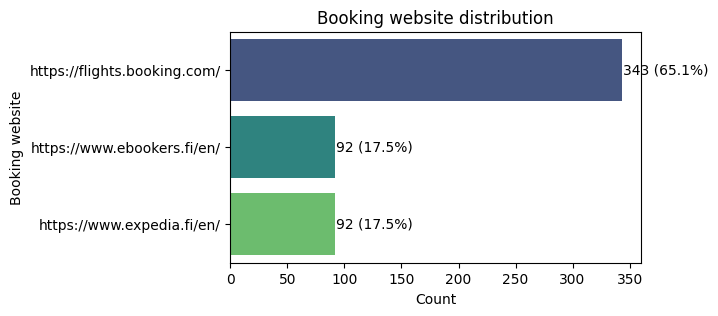

In [12]:
count_data = df['Booking website'].value_counts()
percentage_data = (count_data / len(df)) * 100


website_stats = pd.DataFrame({'Website': count_data.index, 'Count': count_data.values, 'Percentage': percentage_data.values})


plt.figure(figsize=(5.3, 3))


ax = sns.barplot(data=website_stats, y='Website', x='Count', palette='viridis')


for index, row in website_stats.iterrows():
    count = row['Count']
    percentage = row['Percentage']
    ax.text(count + 1, index, f'{count} ({percentage:.1f}%)', va='center', fontsize=10, color='black')


plt.xlabel('Count')
plt.ylabel('Booking website')
plt.title('Booking website distribution')
plt.show()

Below: **Airlines distribution:**  The provided figure illustrates the distribution of airlines, presenting various unique airlines along with their respective counts. Additionally, the percentage representation of each airline is thoughtfully annotated within the visualization.

 ***Insights: Finnair stands out as the airline with the largest number of flights, boasting a total of 107 flights (Out of 527), constituting 20.3% of the entire flight dataset.***

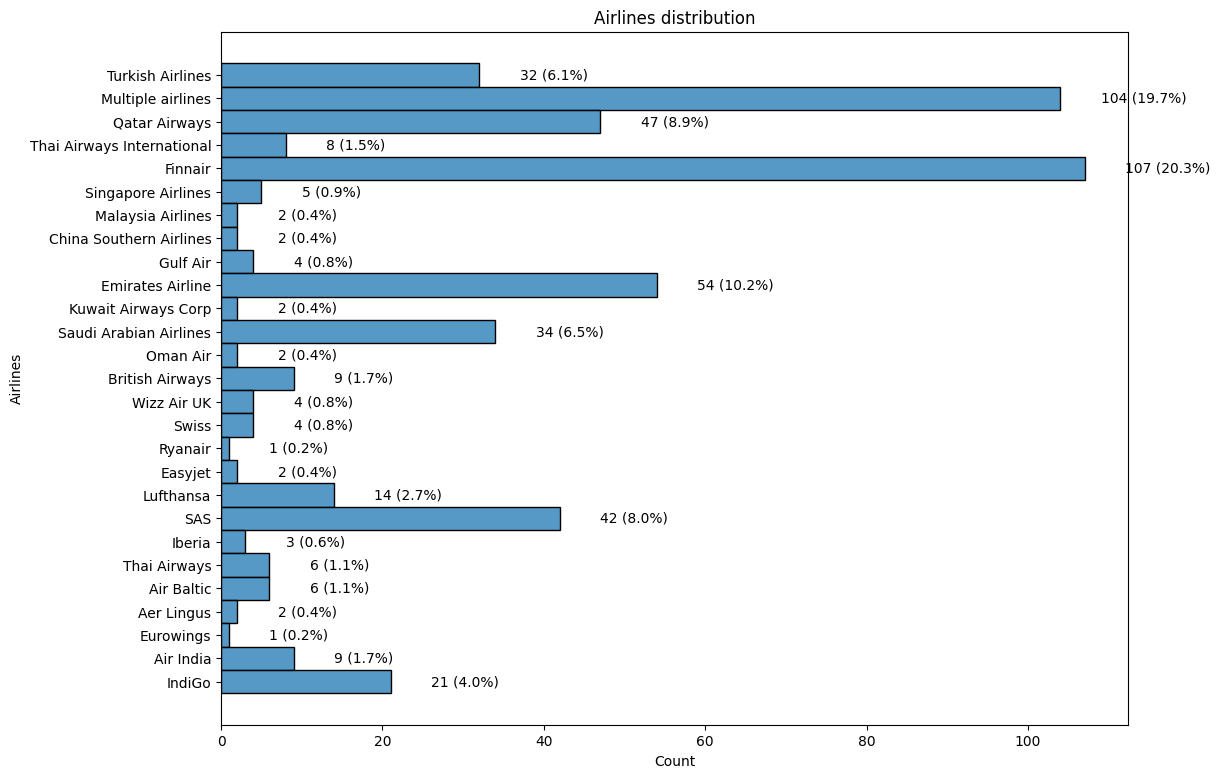

In [13]:

df_airlines = df['airlines'].unique()


plt.figure(figsize=(11.7, 9))


airlines = sns.histplot(data=df, y='airlines')


total_count = df['airlines'].count()
for p in airlines.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total_count)
    count = int(p.get_width())
    airlines.annotate(f'{count} ({percentage})', (p.get_x() + p.get_width() + 5, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

plt.xlabel('Count')
plt.ylabel('Airlines')
plt.title('Airlines distribution')
plt.show()

Below: **Departure time distribution**:  The departure time distribution plot is like a chart that helps us understand when most flights take off on a given day. However, instead of looking at the exact time down to the minutes, we simplify things by only considering the hour when flights depart. For example, if one flight leaves at 12:00 PM and another at 12:15 PM, we treat both as if they left at 12:00 PM. This simplification helps us see the bigger picture of when flights are most likely to take off during the day. It's a way of looking at trends in departure times without getting lost in the small details of specific minutes.

***Insights: The departure pattern analysis indicates that a significant proportion of flights exhibit a preference for morning departures, occurring between 6:00 AM and 10:00 AM, or alternatively, afternoon departures within the time frame of 4:00 PM to 5:00 PM. Of particular interest is the hour of 7:00 AM, which emerges as the peak departure time. Notably, the dataset encompasses more than 60 flights scheduled to depart from Helsinki during the specified day.***


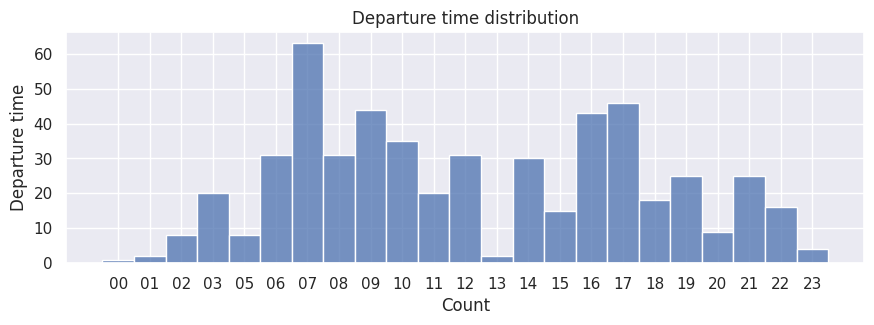

In [46]:
sns.set(rc={'figure.figsize':(10.3,3)})
sns.histplot( df['departure_time'].str[:2].sort_values())
plt.xlabel('Count')
plt.ylabel('Departure time')
plt.title('Departure time distribution')
plt.show()

Below:	**Arrival time distribution**:  The arrival time distribution plot is like a chart that helps us understand when most flights reach the destination. For normalizing the graph, I used same method as departure time.
***Insights: The analysis reveals that a substantial portion of flights tend to arrive at their destination during the morning hours, specifically between 7:00 AM and 9:00 AM, as well as in the evening, spanning the time frame of 5:00 PM to 6:00 PM.***


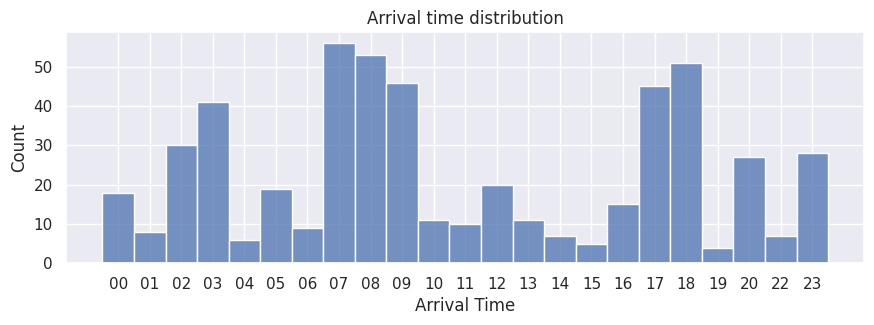

In [51]:
sns.histplot( df['arrival_time'].str[:2].sort_values())
plt.xlabel('Arrival Time')

plt.title('Arrival time distribution')
plt.show()

Below: **Price distribution**:  The price distribution visualization serves as a valuable tool for gaining insights into the predominant price range observed among flights.

***Insights: A notable observation within the dataset is that the majority of flight prices cluster within the range of 600 to 900 euros. Additionally, it is noteworthy that in proximity to the 600 euro mark, the dataset exhibits the highest concentration of flight offerings***

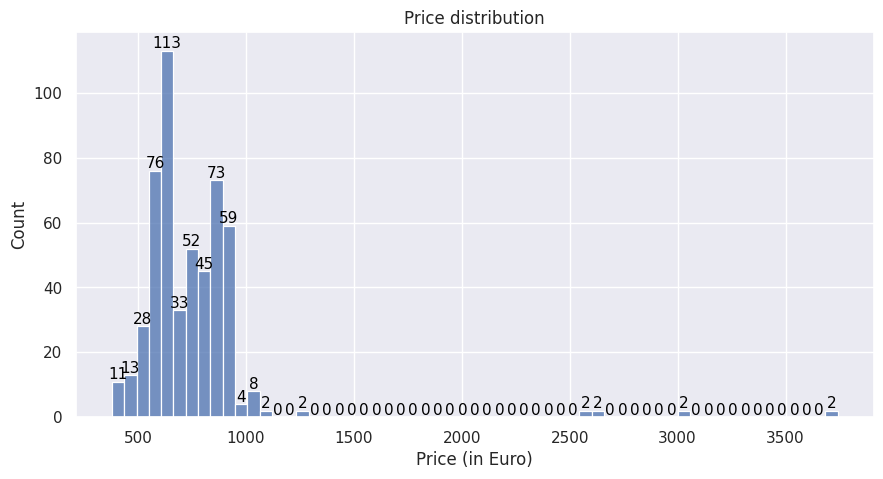

In [54]:
# Assuming 'df' is your DataFrame
sns.histplot(data=df, x='price(euro)')
plt.xlabel('Price (in Euro)')

# Calculate the counts for each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')


plt.title('Price distribution')
plt.show()

Below: **Total trip duration distribution**:  Total trip duration distribution graph help us to understand on an everege how much time will be needed to reach the destination

***Insights: On average, the total trip duration falls within the range of 15 to 30 hours. Notably, the graphical representation illustrates a discernible peak in flight durations slightly exceeding 21 hours, with approximately 104 flights falling within this specific timeframe. This observation underscores the distribution of trip durations within the dataset***


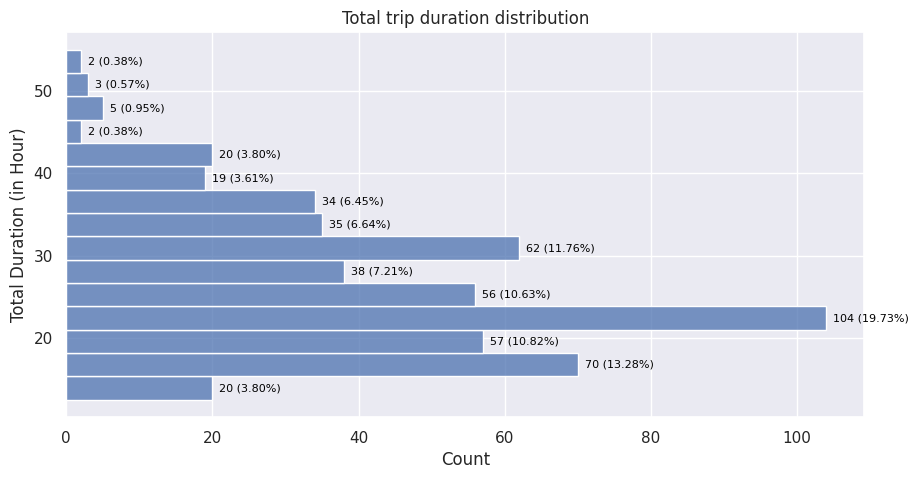

In [57]:
sns.set(rc={'figure.figsize':(10.3,5)})
# Assuming 'df' is your DataFrame
sns.histplot(data=df, y='total_duration(hour)')
plt.ylabel('Total Duration (in Hour)')
plt.xlabel('Count')

# Calculate the total count of samples
total_samples = len(df)

# Loop through each subplot (facet)
for ax in plt.gca().patches:
    # Calculate the count and percentage for each bin
    count = int(ax.get_width())
    percentage = (count / total_samples) * 100
    plt.gca().annotate(f'{count} ({percentage:.2f}%)', (ax.get_width(), ax.get_y() + ax.get_height() / 2.),
                    ha='left', va='center', fontsize=8, color='black', xytext=(5, 0),
                    textcoords='offset points')
plt.title('Total trip duration distribution')

plt.show()

Below: **No of stops distribution**:  No of stops distribution graph help us to understand on an average how many stops will be needed to reach the destination

 ***Insights: Approximately 70% of the total flights, specifically 365 out of the 527 flights analyzed, necessitate two stops along their respective routes. It is worth noting that there are no direct flights available on this particular route***


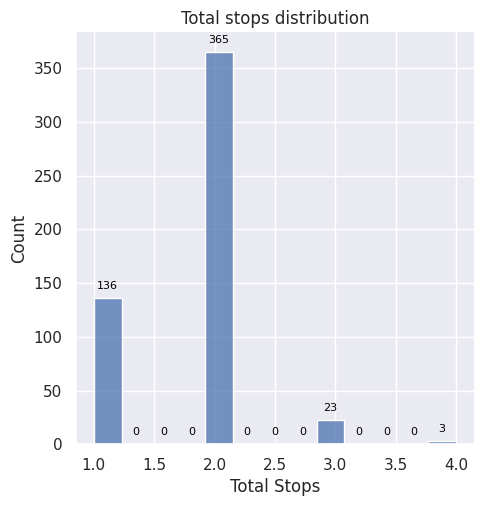

In [59]:
# Assuming 'df' is your DataFrame
g = sns.displot(data=df, x='total_stops_int')
g.set_axis_labels('Total Stops', 'Count')

# Calculate the total count of samples
total_samples = len(df)

# Loop through each subplot (facet)
for ax in g.axes.flat:
    # Calculate the count for each bin
    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.title('Total stops distribution')
plt.show()

Below: **Total layover time distribution**:  Total layover time distribution give us a comprehensive understanding of layover time in the trip.

***Insights: In aggregate, roughly 50% of the flights in question require layover times ranging from 5 to 10 hours, representing a significant portion of the dataset. Furthermore, a minority fraction of flights exhibits layover times exceeding 30 hours, indicating the presence of extended layover durations within the dataset***


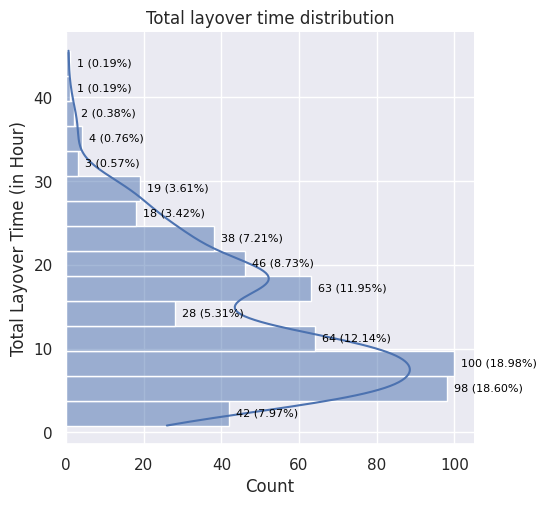

In [60]:
# Assuming 'df' is your DataFrame
g = sns.displot(data=df, y='total_layover_time(hour)', kde=True)
g.set_axis_labels('Count', 'Total Layover Time (in Hour)')

# Calculate the total count of samples
total_samples = len(df)

# Loop through each subplot (facet)
for ax in g.axes.flat:
    # Calculate the count and percentage for each bin
    for p in ax.patches:
        count = int(p.get_width())
        percentage = (count / total_samples) * 100
        ax.annotate(f'{count} ({percentage:.2f}%)', (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', fontsize=8, color='black', xytext=(5, 0),
                    textcoords='offset points')
plt.title('Total layover time distribution')
plt.show()

Below: **Heatmap**:  Using the heatmap, we can determine whether there is any correlation among the different variables in the dataset.

***Insights: A very good correlation exists only between the total trip duration and the total layover time, which is quite obvious given that layover time constitutes a subset of the total trip duration***


<ipython-input-62-36988bb05581>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


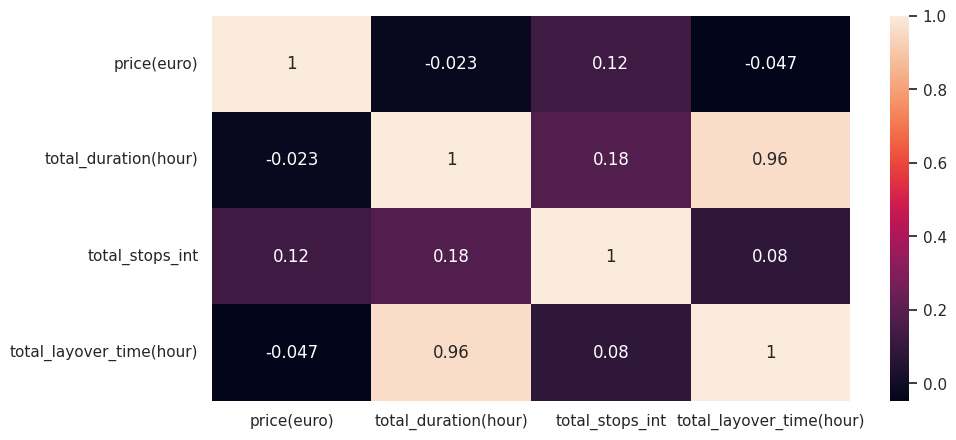

In [62]:
correlation=df.corr()
correlation
sns.heatmap(correlation,cbar=True,annot=True)
plt.show()

Below: **Scatterplot**:  I am visualizing a scatterplot between trip duration and layover duration based on the heat map we have seen.

***Insights: It is likely that the layover duration will be longer if the trip duration is longer.***


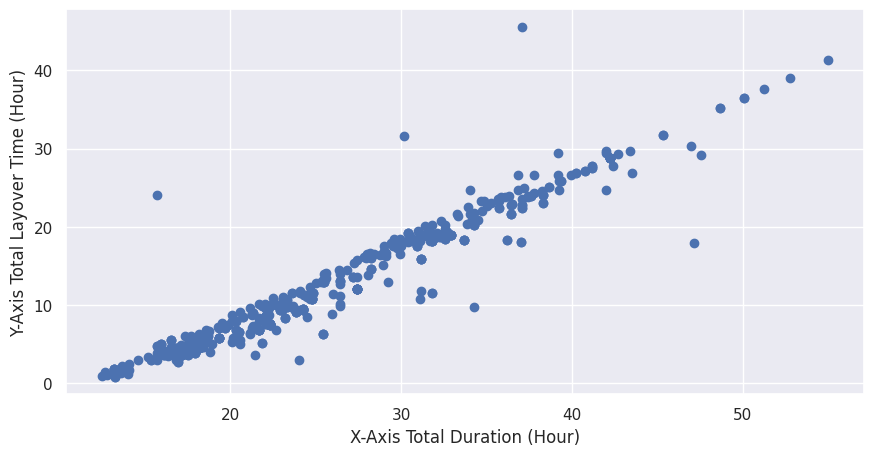

In [67]:
plt.scatter(df['total_duration(hour)'], df['total_layover_time(hour)'])
plt.xlabel('X-Axis Total Duration (Hour)')
plt.ylabel('Y-Axis Total Layover Time (Hour)')
plt.show()

Below: **Scatterplot**:  I am visualizing a scatterplot between total stops and total duration , and total stops and layover duration to see the trend.
Insights: There exists a limited probability that an increase in trip duration and layover time may correspond to a higher number of stops. However, it is essential to note that there is no substantial or definitive correlation observed between trip duration, layover time, and the number of stops in flights


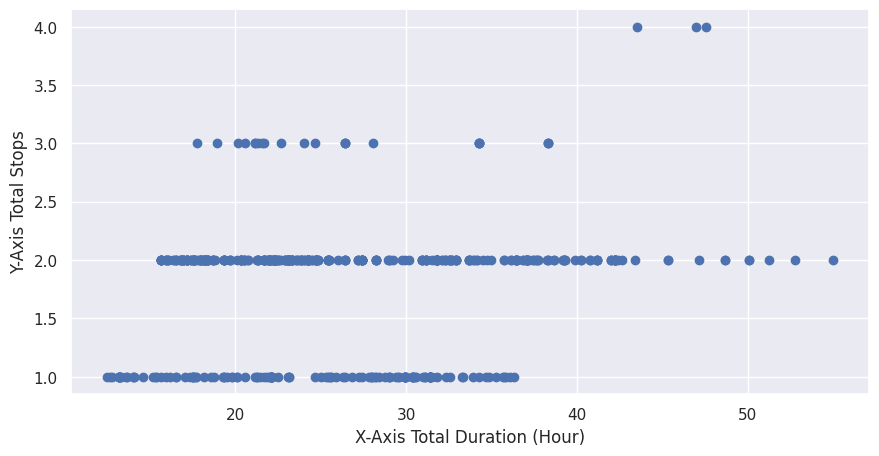

In [64]:
plt.scatter(df['total_duration(hour)'], df['total_stops_int'])
plt.xlabel('X-Axis Total Duration (Hour)')
plt.ylabel('Y-Axis Total Stops')
plt.show()

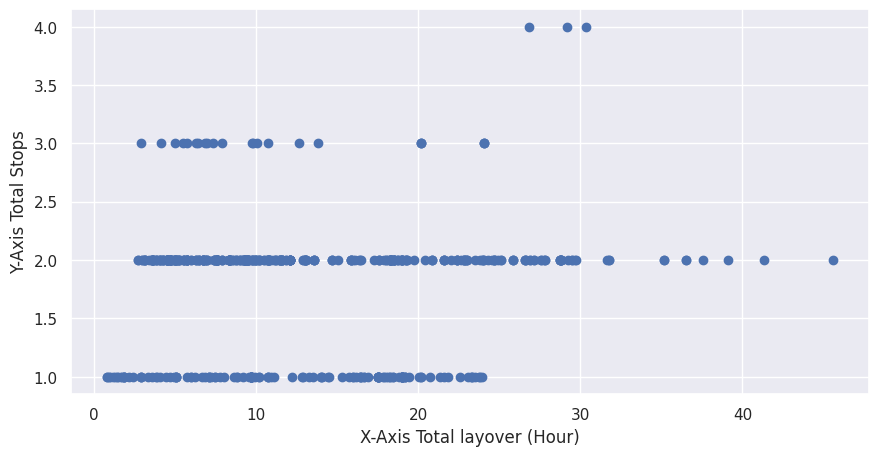

In [69]:
plt.scatter(df['total_layover_time(hour)'], df['total_stops_int'])
plt.xlabel('X-Axis Total layover (Hour)')
plt.ylabel('Y-Axis Total Stops')
plt.show()

Below: **Line graph between airlines and price**:  This line graph is employed for the purpose of elucidating the average pricing trends associated with different airlines. The annotations within the visualization serve the purpose of providing both the count and percentage representation of flights associated with various airlines.

***Insights: The graphical representation yields several noteworthy observations regarding airline pricing. Air India emerges as a provider of competitively priced flights, with an average fare of 471.03 Euros. However, it is important to note that Air India represents a relatively modest share of the flight options, accounting for only 1.71% of the total. In contrast, China Southern Airlines commands the highest average price, with fares averaging 3741.00 Euros, albeit offering only two flights on the given day.
Remarkably, Finnair boasts the highest share of flight options on this route, encompassing approximately 20.30% of all available flights. These flights are associated with an average price of 817.06 Euros.***


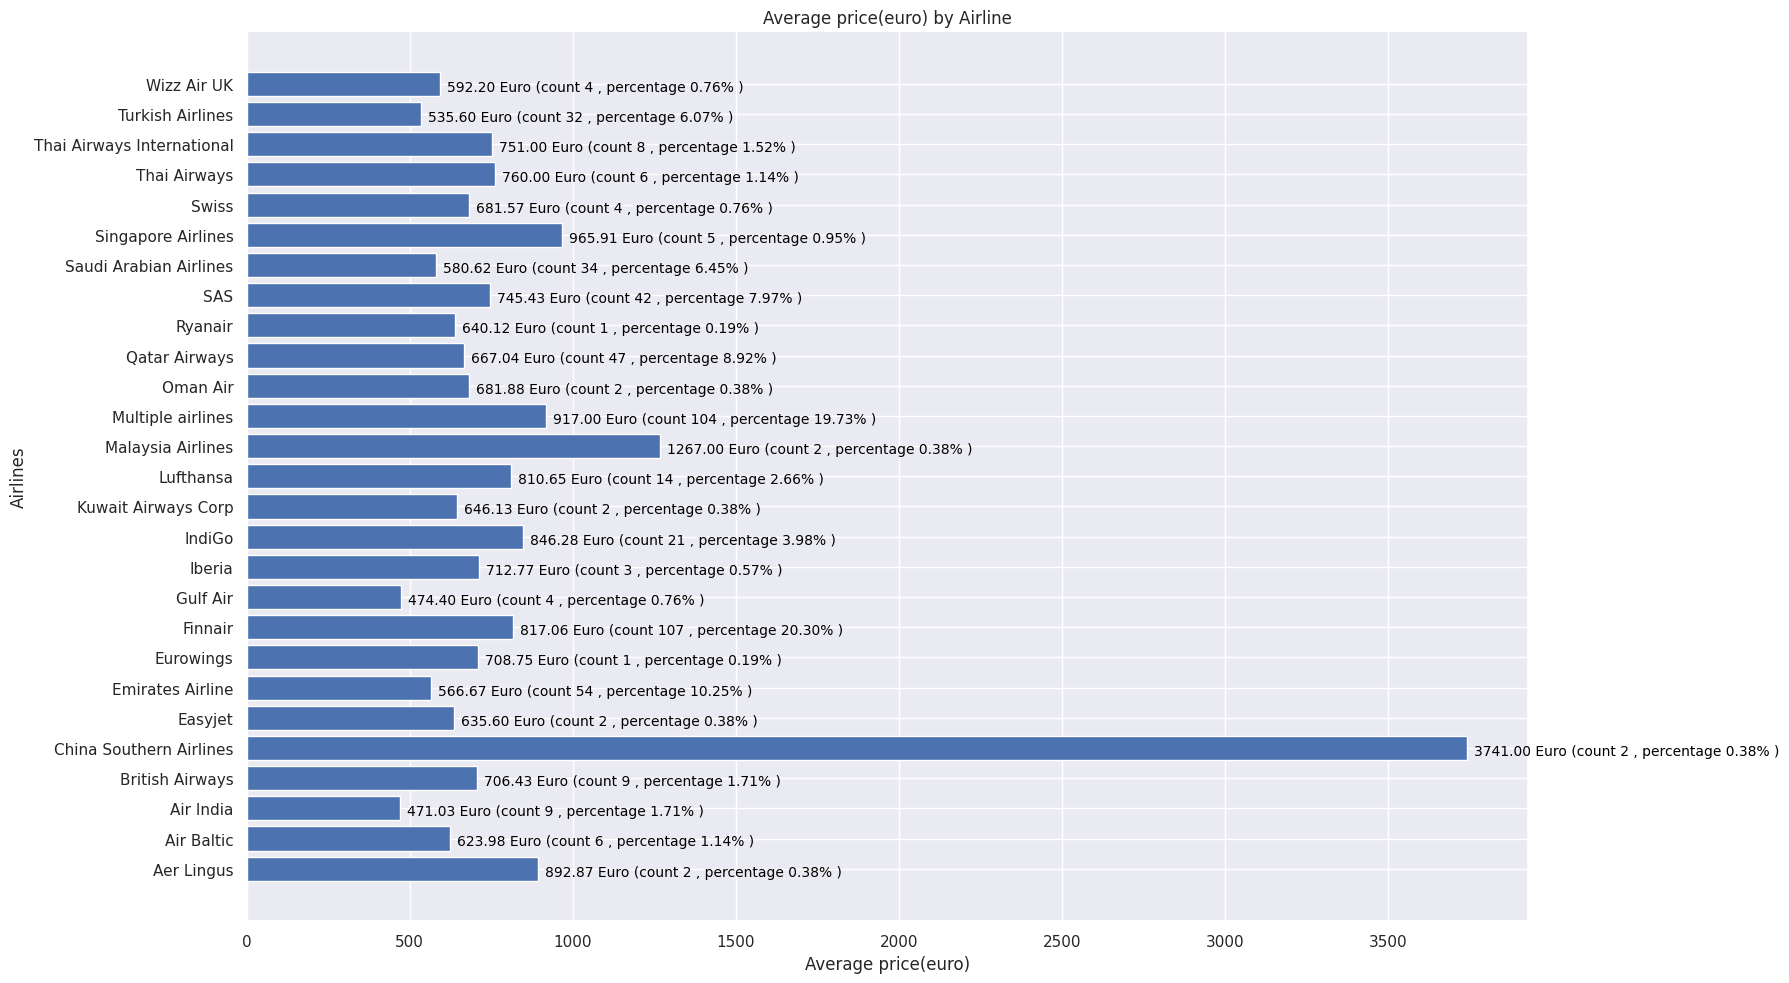

In [71]:

# Calculate the average trip duration and count for each airline
agg_data = df.groupby('airlines')['price(euro)'].agg(['mean', 'count']).reset_index()

# Calculate the percentage based on the count of airlines
total_count = agg_data['count'].sum()
agg_data['percentage'] = (agg_data['count'] / total_count) * 100

# Create a horizontal bar chart
plt.figure(figsize=(18, 10))
bars = plt.barh(agg_data['airlines'], agg_data['mean'])
plt.xlabel('Average price(euro)')
plt.ylabel('Airlines')
plt.title('Average price(euro) by Airline')

# Annotate the bars with the count and percentage values
for bar, airline, count, percentage, duration in zip(bars, agg_data['airlines'], agg_data['count'], agg_data['percentage'], agg_data['mean']):
    annotation = f'{duration:.2f} Euro (count {count} , percentage {percentage:.2f}% )'
    plt.annotate(annotation, (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 xytext=(5, -5), textcoords='offset points', fontsize=10, color='black')


# Display the chart
plt.tight_layout()
plt.show()


Below: **Line graph between airlines and trip duration**:  This line graph is employed for the purpose of elucidating the average trip duration associated with different airlines. The annotations within the visualization serve the purpose of providing both the count and percentage representation of flights associated with various airlines.

***Insights: Air Lingus stands out with the shortest average total trip duration, requiring only 18.00 hours for its flights. However, it's important to note that Air Lingus offers a limited selection, with only two flight options available on that particular day. Conversely, Air India exhibits the longest average total trip duration, with an average of 42.28 hours, despite concurrently offering the most economically priced flights.
Finnair, with the highest frequency of flights on this route, possesses an average total trip duration of 28.54 hours for its most frequently operated flights. These findings offer valuable insights into the comparative temporal aspects of flight offerings by these airlines.***


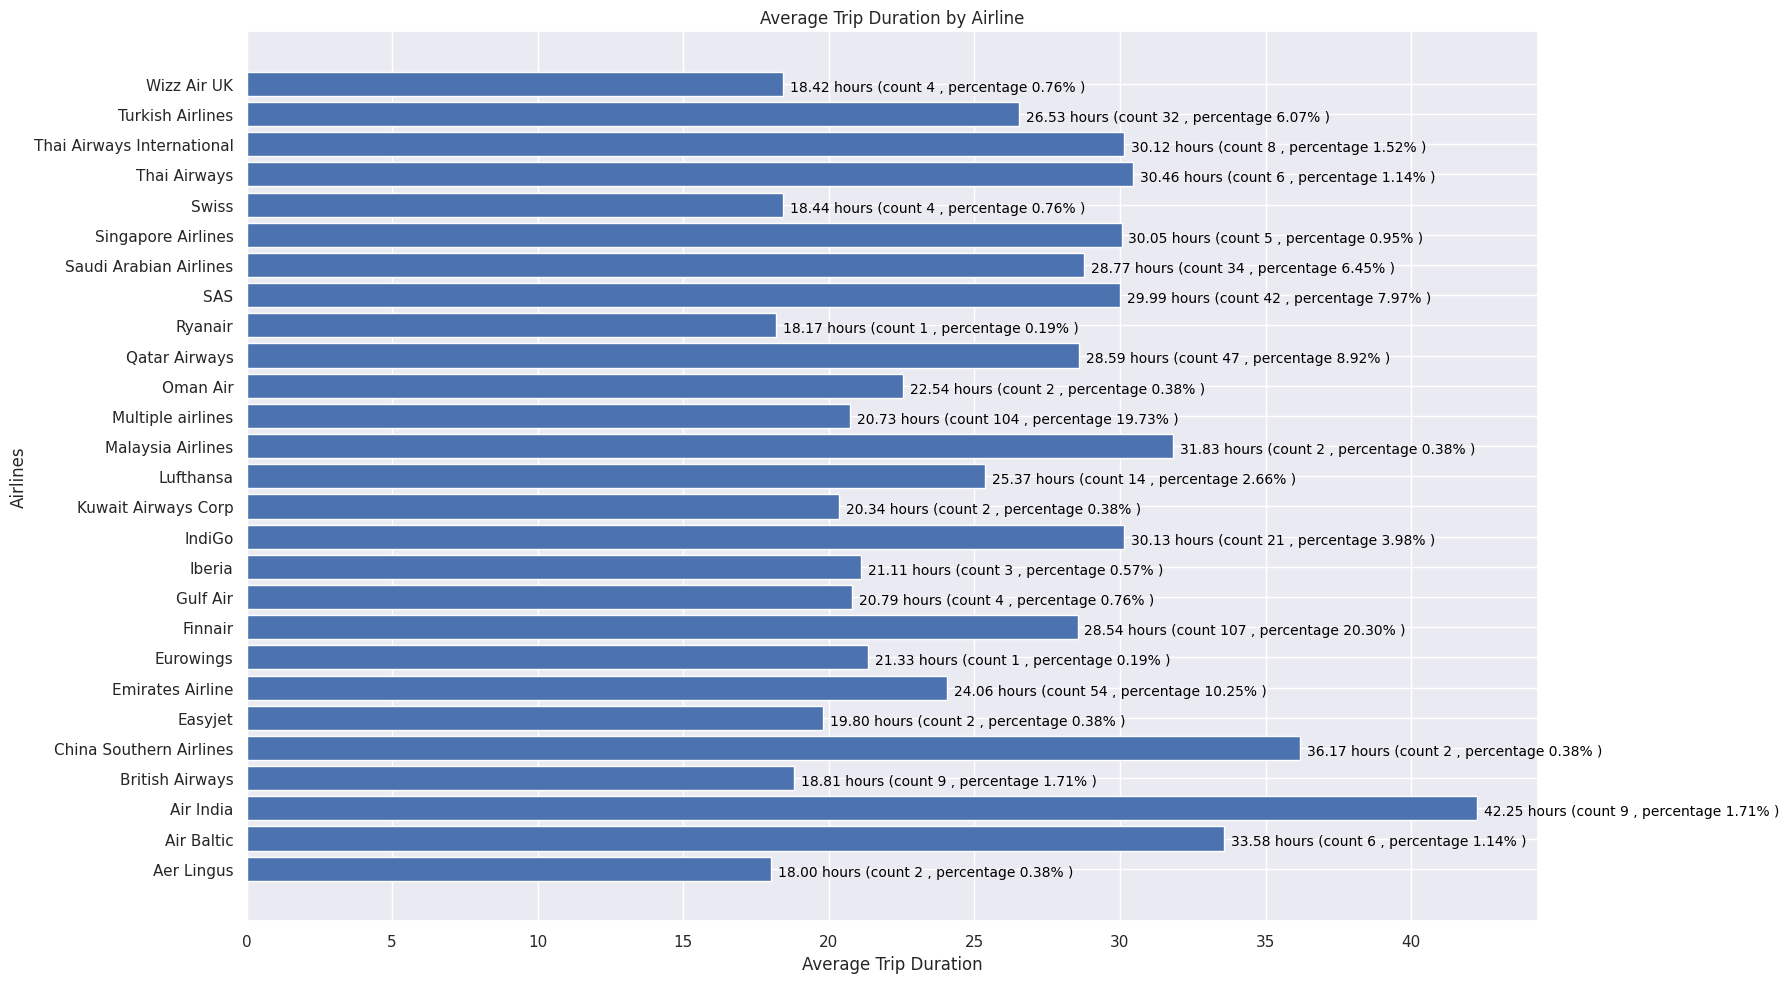

In [73]:


# Calculate the average trip duration and count for each airline
agg_data = df.groupby('airlines')['total_duration(hour)'].agg(['mean', 'count']).reset_index()

# Calculate the percentage based on the count of airlines
total_count = agg_data['count'].sum()
agg_data['percentage'] = (agg_data['count'] / total_count) * 100

# Create a horizontal bar chart
plt.figure(figsize=(18, 10))
bars = plt.barh(agg_data['airlines'], agg_data['mean'])
plt.xlabel('Average Trip Duration')
plt.ylabel('Airlines')
plt.title('Average Trip Duration by Airline')

# Annotate the bars with the count and percentage values
for bar, airline, count, percentage, duration in zip(bars, agg_data['airlines'], agg_data['count'], agg_data['percentage'], agg_data['mean']):
    annotation = f'{duration:.2f} hours (count {count} , percentage {percentage:.2f}% )'
    plt.annotate(annotation, (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 xytext=(5, -5), textcoords='offset points', fontsize=10, color='black')


# Display the chart
plt.tight_layout()
plt.show()





Below: **Line graph between airlines and layover duration**:  This line graph illustrates the average layover duration associated with various airlines. In the visualization, annotations provide both a count and percentage representation of flights associated with different airlines.

***Insights: Like before, Air Lingus has the shortest average total layover duration, requiring only 4.38 hours for its flights. Air India, however, exhibits the longest average total layover duration, with an average of 28.79 hours, despite simultaneously offering the most economically priced routes. The most frequently operated flights by Finnair occupy a total layover duration of 28.54 hours, with the highest frequency of flights on this route.***


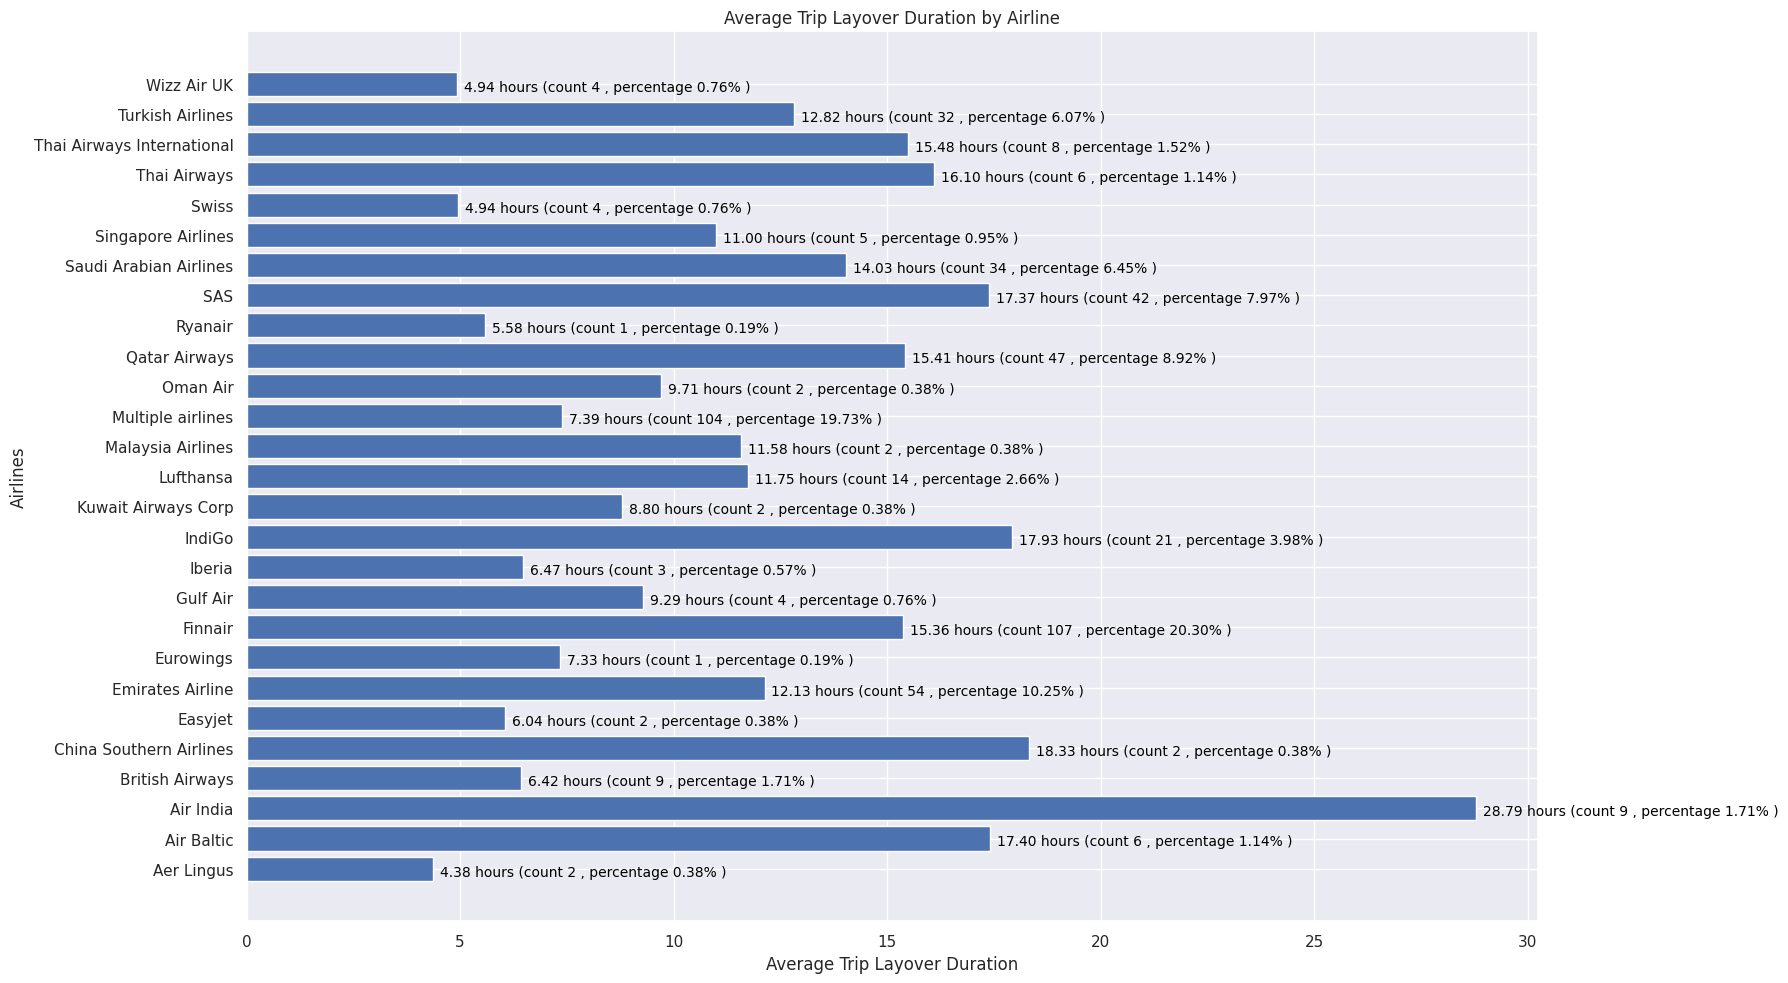

In [75]:

# Calculate the average trip duration and count for each airline
agg_data = df.groupby('airlines')['total_layover_time(hour)'].agg(['mean', 'count']).reset_index()

# Calculate the percentage based on the count of airlines
total_count = agg_data['count'].sum()
agg_data['percentage'] = (agg_data['count'] / total_count) * 100

# Create a horizontal bar chart
plt.figure(figsize=(18, 10))
bars = plt.barh(agg_data['airlines'], agg_data['mean'])
plt.xlabel('Average Trip Layover Duration')
plt.ylabel('Airlines')
plt.title('Average Trip Layover Duration by Airline')

# Annotate the bars with the count and percentage values
for bar, airline, count, percentage, duration in zip(bars, agg_data['airlines'], agg_data['count'], agg_data['percentage'], agg_data['mean']):
    annotation = f'{duration:.2f} hours (count {count} , percentage {percentage:.2f}% )'
    plt.annotate(annotation, (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 xytext=(5, -5), textcoords='offset points', fontsize=10, color='black')


# Display the chart
plt.tight_layout()
plt.show()



Below: **Line graph between airlines and no of stops**:  According to this line graph, the average number of stops for various airlines can be seen. It is possible to view the statistics for flights associated with different airlines using annotations that present both a count and a percentage.

***Insights: The graphical representation affords an observation that several airlines, including Omar Air, Kuwait Airways Crop, Gulf Air, and British Airways, exhibit the lowest average number of stops, which is 1. Conversely, Air Baltic stands out with the highest average number of stops, totaling 3.5. Furthermore, Finnair, the airline with the highest flight frequency, necessitates an average of 1.94 stops for its flights. These insights provide valuable information concerning the distribution of stopover patterns among various airlines within the dataset.***


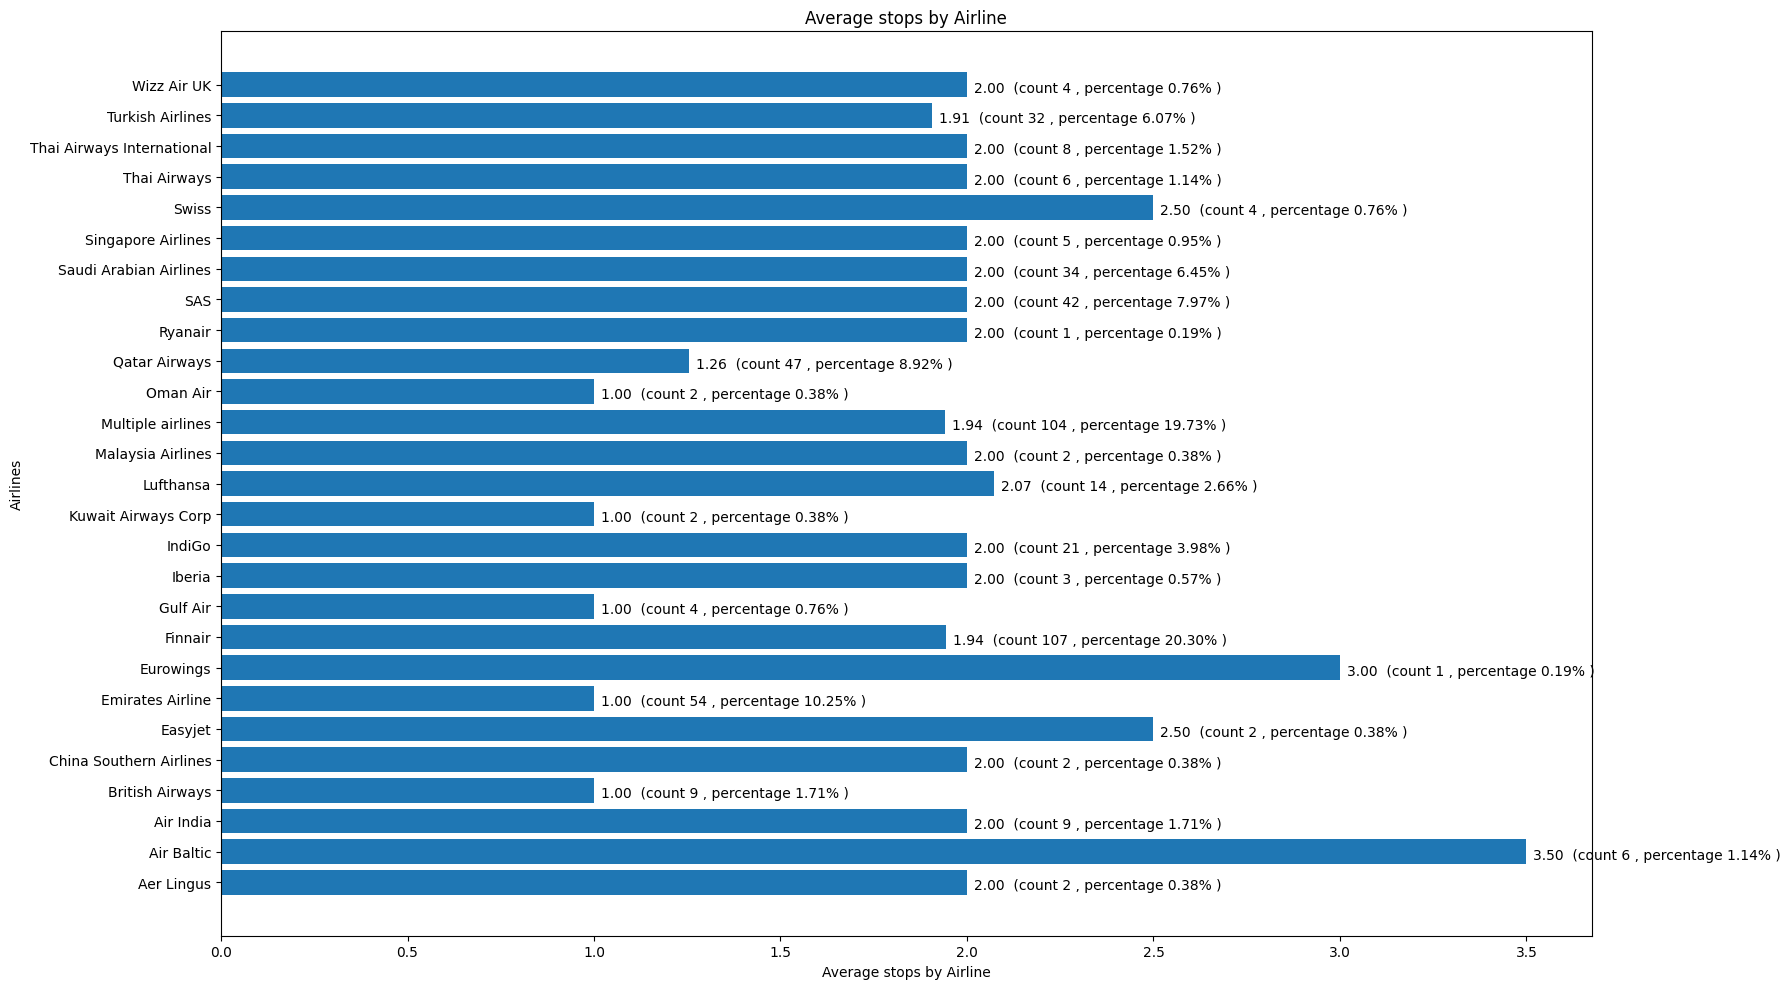

In [15]:
# Calculate the average trip duration and count for each airline
agg_data = df.groupby('airlines')['total_stops_int'].agg(['mean', 'count']).reset_index()

# Calculate the percentage based on the count of airlines
total_count = agg_data['count'].sum()
agg_data['percentage'] = (agg_data['count'] / total_count) * 100

# Create a horizontal bar chart
plt.figure(figsize=(18, 10))
bars = plt.barh(agg_data['airlines'], agg_data['mean'])
plt.xlabel('Average stops by Airline')
plt.ylabel('Airlines')
plt.title('Average stops by Airline')

# Annotate the bars with the count and percentage values
for bar, airline, count, percentage, duration in zip(bars, agg_data['airlines'], agg_data['count'], agg_data['percentage'], agg_data['mean']):
    annotation = f'{duration:.2f}  (count {count} , percentage {percentage:.2f}% )'
    plt.annotate(annotation, (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 xytext=(5, -5), textcoords='offset points', fontsize=10, color='black')


# Display the chart
plt.tight_layout()
plt.show()


**STEP 4:  Interaction with the user**

In [3]:
print("Give your preferable price range (in Euro)")
min_price = input("Enter minimum Price (in Euro): ")
max_price = input("Enter Maximum Price (in Euro): ")
print("Give your preferable trip time duration (in hour)")
min_trip_duration = input("Enter minimum trip time (in hour): ")
max_trip_duration = input("Enter Maximum trip time (in hour): ")
print("Give your preferable no of stops")
no_of_stops=int(input("Enter Maximum No of stops:  "))
if(no_of_stops>0):
  print("Give your preferable layover duration (in hours)")
  maximum_layover_duration=int(input("Enter maximum layover duration (in hours): "))

all_unique_airlines=df['airlines'].unique()
print("All airlines list is gven below:")
for airlines in all_unique_airlines:
    print(airlines)
print("If you have any prefarable airlines write in the input field or keep it empty ")
try:
  airlines_name=input("Enter airlines name or keep it empty: ")
except:
  airlines_name=""
#print(df['airlines'].unique())



data = []
# loop through the rows using iterrows()
for index, row in df.iterrows():
  if float(row['price(euro)'])>float(min_price) and float(row['price(euro)'])<float(max_price) and float(row['total_duration(hour)'])>float(min_trip_duration) and float(row['total_duration(hour)'])<float(max_trip_duration) and int(row['total_stops_int'])<=int(no_of_stops):
    if airlines_name=="":
      data.append(row)
    else:
      if row['airlines']==airlines_name:
        data.append(row)



filtered_df = pd.DataFrame(data)
filtered_df

    #print(f"airlines: {airlines}, Age: {age}, age: {age}")

Give your preferable price range (in Euro)
Enter minimum Price (in Euro): 300
Enter Maximum Price (in Euro): 700
Give your preferable trip time duration (in hour)
Enter minimum trip time (in hour): 15
Enter Maximum trip time (in hour): 30
Give your preferable no of stops
Enter Maximum No of stops:  2
Give your preferable layover duration (in hours)
Enter maximum layover duration (in hours): 20
All airlines list is gven below:
Turkish Airlines
Multiple airlines
Qatar Airways
Thai Airways International
Finnair
Singapore Airlines
Malaysia Airlines
China Southern Airlines
Gulf Air
Emirates Airline
Kuwait Airways Corp
Saudi Arabian Airlines
Oman Air
British Airways
Wizz Air UK
Swiss
Ryanair
Easyjet
Lufthansa
SAS
Iberia
Thai Airways
Air Baltic
Aer Lingus
Eurowings
Air India
IndiGo
If you have any prefarable airlines write in the input field or keep it empty 
Enter airlines name or keep it empty: 


,Booking website,airlines,departure_time,arrival_time,price(euro),total_duration(hour),total_stops_int,total_layover_time(hour),layover_info
2,https://www.ebookers.fi/en/,Multiple airlines,08:40,08:00,629.00,21.67,2,6.75,5h 20m in London (LHR) 1h 25m in Dubai (DXB)
3,https://www.ebookers.fi/en/,Multiple airlines,17:20,16:00,629.00,22.33,2,7.58,4h 40m in London (LHR) 2h 55m in Dubai (DXB)
4,https://www.ebookers.fi/en/,Multiple airlines,17:20,14:05,629.00,24.25,2,9.50,6h 35m in London (LHR) 2h 55m in Dubai (DXB)
5,https://www.ebookers.fi/en/,Qatar Airways,18:15,17:10,642.00,22.08,1,9.67,9h 40m in Doha (DOH)
6,https://www.ebookers.fi/en/,Qatar Airways,02:05,17:10,645.00,29.92,1,17.50,17h 30m in Doha (DOH)
...,...,...,...,...,...,...,...,...,...
380,https://flights.booking.com/,Qatar Airways,17:10,20:55,693.65,24.75,2,11.58,1h 00m - DOH Â· Doha 10h 35m - DXB Â· Dubai
398,https://flights.booking.com/,SAS,07:10,12:10,682.92,26.00,2,11.42,6h 40m - ARN Â· Stockholm Arlanda Apt 4h 45m -...
416,https://flights.booking.com/,SAS,09:20,17:20,648.73,29.00,2,16.42,6h 00m - ARN Â· Stockholm Arlanda Apt 10h 25m ...
423,https://flights.booking.com/,Finnair,12:50,20:55,656.62,29.08,2,16.33,2h 35m - ARN Â· Stockholm Arlanda Apt 13h 45m ...


In [4]:
filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 2 to 431
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking website           157 non-null    object 
 1   airlines                  157 non-null    object 
 2   departure_time            157 non-null    object 
 3   arrival_time              157 non-null    object 
 4   price(euro)               157 non-null    float64
 5   total_duration(hour)      157 non-null    float64
 6   total_stops_int           157 non-null    int64  
 7   total_layover_time(hour)  157 non-null    float64
 8   layover_info              157 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 12.3+ KB


In [5]:
while True:
  print("-------------------------------------------------------")
  print("To sort data select the number based on the criteria\n1. Sort by Booking Website \n2. Sort by airlines\n3. Sort by arrival time \n4. Sort by departure time \n5. Sort by price(euro) \n6. Sort by total duration(hour)\n7. Sort by no of Stops\n8. Sort by total layover time(hour)\n0. Exit")
  filter_by=input("Select option like 1/2/3...... ")
  if filter_by=='1':
    print("Selected 1")
    sorted_df=pd.DataFrame(filtered_df.sort_values(by='Booking website'))
  elif filter_by=='2':
    print("Selected 2")
    sorted_df=pd.DataFrame(filtered_df.sort_values(by='airlines'))
  elif filter_by=='3':
    print("Selected 3")
    sorted_df=pd.DataFrame(filtered_df.sort_values(by='arrival_time'))
  elif filter_by=='4':
    print("Selected 4")
    sorted_df=pd.DataFrame(filtered_df.sort_values(by='departure_time'))
  elif filter_by=='5':
    print("Selected 5")
    sorted_df=pd.DataFrame(filtered_df.sort_values(by='price(euro)'))
  elif filter_by=='6':
    print("Selected 6")
    sorted_df=pd.DataFrame(filtered_df.sort_values(by='total_duration(hour)'))
  elif filter_by=='7':
    print("Selected 7")
    sorted_df=pd.DataFrame(filtered_df.sort_values(by='total_stops_int'))
  elif filter_by=='8':
    print("Selected 8")
    sorted_df=pd.DataFrame(filtered_df.sort_values(by='total_layover_time(hour)'))
  elif filter_by=='0':
    break
  else:
    print ("Please select a correct option to sort the filtered data")

  display(sorted_df)



-------------------------------------------------------
To sort data select the number based on the criteria
1. Sort by Booking Website 
2. Sort by airlines
3. Sort by arrival time 
4. Sort by departure time 
5. Sort by price(euro) 
6. Sort by total duration(hour)
7. Sort by no of Stops
8. Sort by total layover time(hour)
0. Exit
Select option like 1/2/3...... 4
Selected 4


,Booking website,airlines,departure_time,arrival_time,price(euro),total_duration(hour),total_stops_int,total_layover_time(hour),layover_info
6,https://www.ebookers.fi/en/,Qatar Airways,02:05,17:10,645.00,29.92,1,17.50,17h 30m in Doha (DOH)
248,https://flights.booking.com/,Easyjet,05:40,05:05,634.17,18.42,2,5.75,4h 20m - ATH Â· Athens Eleftherios Venizelos I...
247,https://flights.booking.com/,Ryanair,05:55,05:05,640.12,18.17,2,5.58,4h 10m - ATH Â· Athens Eleftherios Venizelos I...
254,https://flights.booking.com/,Lufthansa,06:30,10:05,565.69,22.58,2,10.08,4h 30m - FRA Â· Frankfurt International Apt 5h...
252,https://flights.booking.com/,Lufthansa,06:30,04:40,692.29,17.17,2,4.42,2h 20m - FRA Â· Frankfurt International Apt 2h...
...,...,...,...,...,...,...,...,...,...
349,https://flights.booking.com/,Emirates Airline,22:15,07:10,667.10,27.92,1,16.00,16h 00m - DXB Â· Dubai
312,https://flights.booking.com/,Emirates Airline,22:15,08:40,589.94,29.42,1,17.92,17h 55m - DXB Â· Dubai
226,https://flights.booking.com/,Emirates Airline,22:15,23:20,576.74,20.08,1,8.67,8h 40m - DXB Â· Dubai
229,https://flights.booking.com/,Emirates Airline,22:15,20:55,653.98,17.67,1,5.75,5h 45m - DXB Â· Dubai


-------------------------------------------------------
To sort data select the number based on the criteria
1. Sort by Booking Website 
2. Sort by airlines
3. Sort by arrival time 
4. Sort by departure time 
5. Sort by price(euro) 
6. Sort by total duration(hour)
7. Sort by no of Stops
8. Sort by total layover time(hour)
0. Exit
Select option like 1/2/3...... 5
Selected 5


,Booking website,airlines,departure_time,arrival_time,price(euro),total_duration(hour),total_stops_int,total_layover_time(hour),layover_info
184,https://flights.booking.com/,Gulf Air,22:05,19:00,379.84,15.92,1,4.42,4h 25m - BAH Â· Bahrain
198,https://flights.booking.com/,Gulf Air,22:05,04:40,397.85,25.58,1,14.08,14h 05m - BAH Â· Bahrain
224,https://flights.booking.com/,Gulf Air,10:00,19:00,448.52,28.00,1,16.50,16h 30m - BAH Â· Bahrain
243,https://flights.booking.com/,Wizz Air UK,06:40,11:35,515.74,23.92,2,9.25,2h 40m - IST Â· Istanbul Airport 6h 35m - JED ...
234,https://flights.booking.com/,Emirates Airline,14:55,20:55,531.66,25.00,1,12.83,12h 50m - DXB Â· Dubai
...,...,...,...,...,...,...,...,...,...
22,https://www.ebookers.fi/en/,Thai Airways International,12:10,09:20,686.00,23.83,2,9.17,4h 25m in Stockholm (ARN) 4h 45m in Bangkok (BKK)
114,https://www.expedia.fi/en/,Thai Airways International,09:20,12:10,686.00,23.83,2,9.17,4h 25m in Stockholm (ARN) 4h 45m in Bangkok (BKK)
357,https://flights.booking.com/,SAS,09:20,12:10,687.37,23.83,2,9.17,4h 25m - ARN Â· Stockholm Arlanda Apt 4h 45m -...
252,https://flights.booking.com/,Lufthansa,06:30,04:40,692.29,17.17,2,4.42,2h 20m - FRA Â· Frankfurt International Apt 2h...


-------------------------------------------------------
To sort data select the number based on the criteria
1. Sort by Booking Website 
2. Sort by airlines
3. Sort by arrival time 
4. Sort by departure time 
5. Sort by price(euro) 
6. Sort by total duration(hour)
7. Sort by no of Stops
8. Sort by total layover time(hour)
0. Exit
Select option like 1/2/3...... 0


In [8]:
while True:
  data_f=[]
  filtered_df_f=[]
  flag=0
  try:
    print("If you have any preferable departure time input it in the below field or keep it empty")
    prefered_departure_time = input("Enter time (HH:MM) (You can also keep it empty) ")
    # loop through the rows using iterrows()
    for index, row in filtered_df.iterrows():
      #print(row['departure_time'])
      if row['departure_time']== prefered_departure_time:
        flag=1
        data_f.append(row)
        #print("Matched",row)
    filtered_df_f = pd.DataFrame(data_f)
    filtered_df_f
  except:
    filtered_df_f=filtered_df
    flag=2

  if flag==0:
    print("\n----------------------------------------------------------------\n")
    print("Did not find any flight of your preferred time. So below data based on the previous filtered data")
    cheapest_flight=pd.DataFrame(filtered_df.sort_values(by='price(euro)')[:1])
    print("\n----------------------------------------------------------------\n")
    print("Cheapeased flight information is given below")
    print("Price:", cheapest_flight.iloc[0]['price(euro)'])
    if cheapest_flight.iloc[0]['total_stops_int']==0:
      stops="Direct"
    else:
      stops=cheapest_flight.iloc[0]['total_stops_int']
    print("No of Stops: ", stops)
    print("Total trip duration(hour): ", cheapest_flight.iloc[0]['total_duration(hour)'])
    print("Booking Website:  ", cheapest_flight.iloc[0]['Booking website'])
    print("Airlines: ", cheapest_flight.iloc[0]['airlines'])
    print("Departure time: ", cheapest_flight.iloc[0]['departure_time'])
    print("Arrival time: ", cheapest_flight.iloc[0]['arrival_time'])

    print("Total layover time(hour): ", cheapest_flight.iloc[0]['total_layover_time(hour)'])
    print("Layover info: ", cheapest_flight.iloc[0]['layover_info'])


    #Fastest flight
    fastest_flight=pd.DataFrame(filtered_df.sort_values(by='total_duration(hour)')[:1])
    print("\n----------------------------------------------------------------\n")
    print("Fastest flight information is given below")
    print("Price:", fastest_flight.iloc[0]['price(euro)'])
    if fastest_flight.iloc[0]['total_stops_int']==0:
      stops="Direct"
    else:
      stops=fastest_flight.iloc[0]['total_stops_int']
    print("No of Stops: ", stops)
    print("Total trip duration(hour): ", fastest_flight.iloc[0]['total_duration(hour)'])
    print("Booking Website:  ", fastest_flight.iloc[0]['Booking website'])
    print("Airlines: ", fastest_flight.iloc[0]['airlines'])
    print("Departure time: ", fastest_flight.iloc[0]['departure_time'])
    print("Arrival time: ", fastest_flight.iloc[0]['arrival_time'])

    print("Total layover time(hour): ", fastest_flight.iloc[0]['total_layover_time(hour)'])
    print("Layover info: ", fastest_flight.iloc[0]['layover_info'])
  elif flag==2:
    print("\n----------------------------------------------------------------\n")
    print("You kept the preferable departure time field empty. So below data based on the previous filtered data")
    cheapest_flight=pd.DataFrame(filtered_df.sort_values(by='price(euro)')[:1])
    print("\n----------------------------------------------------------------\n")
    print("Cheapeased flight information is given below")
    print("Price:", cheapest_flight.iloc[0]['price(euro)'])
    if cheapest_flight.iloc[0]['total_stops_int']==0:
      stops="Direct"
    else:
      stops=cheapest_flight.iloc[0]['total_stops_int']
    print("No of Stops: ", stops)
    print("Total trip duration(hour): ", cheapest_flight.iloc[0]['total_duration(hour)'])
    print("Booking Website:  ", cheapest_flight.iloc[0]['Booking website'])
    print("Airlines: ", cheapest_flight.iloc[0]['airlines'])
    print("Departure time: ", cheapest_flight.iloc[0]['departure_time'])
    print("Arrival time: ", cheapest_flight.iloc[0]['arrival_time'])

    print("Total layover time(hour): ", cheapest_flight.iloc[0]['total_layover_time(hour)'])
    print("Layover info: ", cheapest_flight.iloc[0]['layover_info'])


    #Fastest flight
    fastest_flight=pd.DataFrame(filtered_df.sort_values(by='total_duration(hour)')[:1])
    print("\n----------------------------------------------------------------\n")
    print("Fastest flight information is given below")
    print("Price:", fastest_flight.iloc[0]['price(euro)'])
    if fastest_flight.iloc[0]['total_stops_int']==0:
      stops="Direct"
    else:
      stops=fastest_flight.iloc[0]['total_stops_int']
    print("No of Stops: ", stops)
    print("Total trip duration(hour): ", fastest_flight.iloc[0]['total_duration(hour)'])
    print("Booking Website:  ", fastest_flight.iloc[0]['Booking website'])
    print("Airlines: ", fastest_flight.iloc[0]['airlines'])
    print("Departure time: ", fastest_flight.iloc[0]['departure_time'])
    print("Arrival time: ", fastest_flight.iloc[0]['arrival_time'])

    print("Total layover time(hour): ", fastest_flight.iloc[0]['total_layover_time(hour)'])
    print("Layover info: ", fastest_flight.iloc[0]['layover_info'])
  else:
    display(filtered_df_f)
    #cheapest flight
    cheapest_flight=pd.DataFrame(filtered_df_f.sort_values(by='price(euro)')[:1])
    print("\n----------------------------------------------------------------\n")
    print("Cheapeased flight information is given below")
    print("Price:", cheapest_flight.iloc[0]['price(euro)'])
    if cheapest_flight.iloc[0]['total_stops_int']==0:
      stops="Direct"
    else:
      stops=cheapest_flight.iloc[0]['total_stops_int']
    print("No of Stops: ", stops)
    print("Total trip duration(hour): ", cheapest_flight.iloc[0]['total_duration(hour)'])
    print("Booking Website:  ", cheapest_flight.iloc[0]['Booking website'])
    print("Airlines: ", cheapest_flight.iloc[0]['airlines'])
    print("Departure time: ", cheapest_flight.iloc[0]['departure_time'])
    print("Arrival time: ", cheapest_flight.iloc[0]['arrival_time'])

    print("Total layover time(hour): ", cheapest_flight.iloc[0]['total_layover_time(hour)'])
    print("Layover info: ", cheapest_flight.iloc[0]['layover_info'])


    #Fastest flight
    fastest_flight=pd.DataFrame(filtered_df_f.sort_values(by='total_duration(hour)')[:1])
    print("\n----------------------------------------------------------------\n")
    print("Fastest flight information is given below")
    print("Price:", fastest_flight.iloc[0]['price(euro)'])
    if fastest_flight.iloc[0]['total_stops_int']==0:
      stops="Direct"
    else:
      stops=fastest_flight.iloc[0]['total_stops_int']
    print("No of Stops: ", stops)
    print("Total trip duration(hour): ", fastest_flight.iloc[0]['total_duration(hour)'])
    print("Booking Website:  ", fastest_flight.iloc[0]['Booking website'])
    print("Airlines: ", fastest_flight.iloc[0]['airlines'])
    print("Departure time: ", fastest_flight.iloc[0]['departure_time'])
    print("Arrival time: ", fastest_flight.iloc[0]['arrival_time'])

    print("Total layover time(hour): ", fastest_flight.iloc[0]['total_layover_time(hour)'])
    print("Layover info: ", fastest_flight.iloc[0]['layover_info'])
  e=int(input("If you want to finish press 0. if not press any key: "))
  if e==0:
    break



If you have any preferable departure time input it in the below field or keep it empty
Enter time (HH:MM) (You can also keep it empty) 08:20


,Booking website,airlines,departure_time,arrival_time,price(euro),total_duration(hour),total_stops_int,total_layover_time(hour),layover_info
109,https://www.expedia.fi/en/,Multiple airlines,08:20,08:40,661.00,21.33,2,9.0,7h 5m in Stockholm (ARN) 1h 55m in Dubai (DXB)
296,https://flights.booking.com/,Finnair,08:20,08:40,656.62,21.33,2,9.0,7h 05m - ARN Â· Stockholm Arlanda Apt 1h 55m -...



----------------------------------------------------------------

Cheapeased flight information is given below
Price: 656.62
No of Stops:  2
Total trip duration(hour):  21.33
Booking Website:   https://flights.booking.com/
Airlines:  Finnair
Departure time:  08:20
Arrival time:  08:40
Total layover time(hour):  9.0
Layover info:  7h 05m - ARN Â· Stockholm Arlanda Apt 1h 55m - DXB Â· Dubai 

----------------------------------------------------------------

Fastest flight information is given below
Price: 661.0
No of Stops:  2
Total trip duration(hour):  21.33
Booking Website:   https://www.expedia.fi/en/
Airlines:  Multiple airlines
Departure time:  08:20
Arrival time:  08:40
Total layover time(hour):  9.0
Layover info:  7h 5m in Stockholm (ARN) 1h 55m in Dubai (DXB)
If you want to finish press 0. if not press any key: 1
If you have any preferable departure time input it in the below field or keep it empty
Enter time (HH:MM) (You can also keep it empty) 22:15


,Booking website,airlines,departure_time,arrival_time,price(euro),total_duration(hour),total_stops_int,total_layover_time(hour),layover_info
226,https://flights.booking.com/,Emirates Airline,22:15,23:20,576.74,20.08,1,8.67,8h 40m - DXB Â· Dubai
229,https://flights.booking.com/,Emirates Airline,22:15,20:55,653.98,17.67,1,5.75,5h 45m - DXB Â· Dubai
312,https://flights.booking.com/,Emirates Airline,22:15,08:40,589.94,29.42,1,17.92,17h 55m - DXB Â· Dubai
349,https://flights.booking.com/,Emirates Airline,22:15,07:10,667.10,27.92,1,16.00,16h 00m - DXB Â· Dubai



----------------------------------------------------------------

Cheapeased flight information is given below
Price: 576.74
No of Stops:  1
Total trip duration(hour):  20.08
Booking Website:   https://flights.booking.com/
Airlines:  Emirates Airline
Departure time:  22:15
Arrival time:  23:20
Total layover time(hour):  8.67
Layover info:  8h 40m - DXB Â· Dubai 

----------------------------------------------------------------

Fastest flight information is given below
Price: 653.98
No of Stops:  1
Total trip duration(hour):  17.67
Booking Website:   https://flights.booking.com/
Airlines:  Emirates Airline
Departure time:  22:15
Arrival time:  20:55
Total layover time(hour):  5.75
Layover info:  5h 45m - DXB Â· Dubai 
If you want to finish press 0. if not press any key: 0
